<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages\
import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from keras.optimizers import Adam
from keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout
from keras.callbacks import LearningRateScheduler
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3

import matplotlib.pyplot as plt
%matplotlib inline


### Model that are referenced in the report is indicated below the model title

## Step 1: Data Loading

In [5]:
import os
#change the base_dir to the path your folder resides
base_dir = 'D:\\documents\\Y2 Sem 2\\DL\\Assignment 1'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')
base_dir = "/content/drive/My Drive/Deep Learning/Assignment 1/Data"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

Mounted at /content/drive


For Categorical Class Mode

In [3]:
img_size = 150

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

NameError: name 'train_dir' is not defined

For Sparse Categorical Class Mode

In [6]:
img_size = 150

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
validation_generator

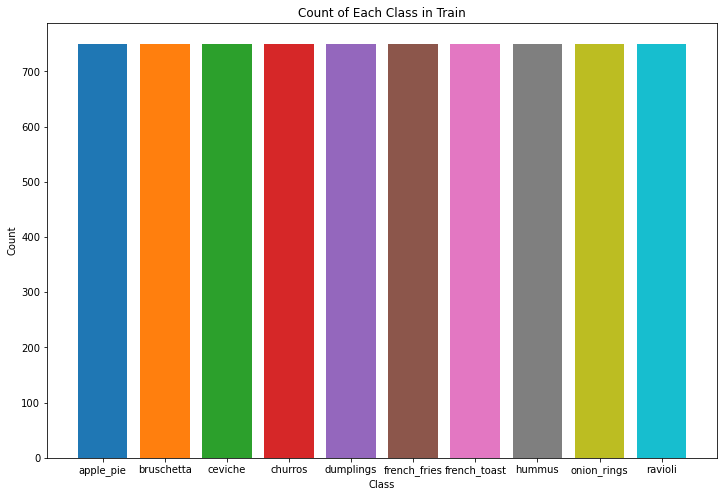

In [116]:
import numpy as np

import matplotlib.pyplot as plt

class_counts = {}
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Generate 10 colors

for class_name, class_index in train_generator.class_indices.items():
    class_dir = os.path.join(train_dir, class_name)
    class_count = len(os.listdir(class_dir))
    class_counts[class_name] = class_count

plt.figure(figsize=(12, 8))
plt.bar(class_counts.keys(), class_counts.values(), color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in Train')
plt.show()

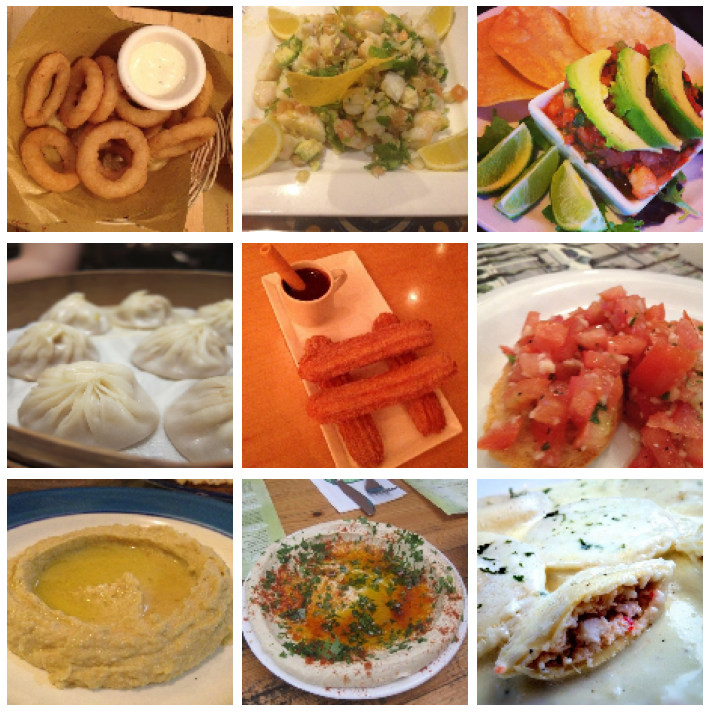

In [27]:
images, labels = next(train_generator)

# Select 9 random images from the batch
random_indices = np.random.choice(images.shape[0], size=9, replace=False)
selected_images = images[random_indices]

# Plot the images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for img, ax in zip(selected_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

## Step 2:  Develop the Image Classification Models

### BaseLine Model


Baseline Moodel in report

In [ ]:
# Build the Model

img_size = 150

baseline_model = models.Sequential()
baseline_model.add(layers.Conv2D(32, (3,3), activation = 'relu',
                                 input_shape = (img_size, img_size, 3)))
baseline_model.add(layers.MaxPooling2D((2,2)))
baseline_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))
baseline_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))
baseline_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(512, activation='relu'))
baseline_model.add(layers.Dense(10, activation = 'softmax'))

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
baseline_model.compile(loss = "categorical_crossentropy",
                       optimizer=optimizers.RMSprop(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [ ]:
# Train the Model
history = baseline_model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/100
375/375 [==============================] - 7184s 19s/step - loss: 2.1370 - acc: 0.2188 - val_loss: 2.0596 - val_acc: 0.2570
Epoch 2/100
375/375 [==============================] - 39s 104ms/step - loss: 1.9576 - acc: 0.3063 - val_loss: 1.9759 - val_acc: 0.2935
Epoch 3/100
375/375 [==============================] - 40s 107ms/step - loss: 1.8763 - acc: 0.3424 - val_loss: 1.9425 - val_acc: 0.3090
Epoch 4/100
375/375 [==============================] - 38s 100ms/step - loss: 1.7992 - acc: 0.3693 - val_loss: 1.9156 - val_acc: 0.3390
Epoch 5/100
375/375 [==============================] - 41s 108ms/step - loss: 1.7173 - acc: 0.4044 - val_loss: 1.8624 - val_acc: 0.3505
Epoch 6/100
375/375 [==============================] - 43s 115ms/step - loss: 1.6353 - acc: 0.4353 - val_loss: 1.8103 - val_acc: 0.3660
Epoch 7/100
375/375 [==============================] - 39s 104ms/step - loss: 1.5457 - acc: 0.4680 - val_loss: 1.7554 - val_acc: 0.3905
Epoch 8/100
375/375 [===========================

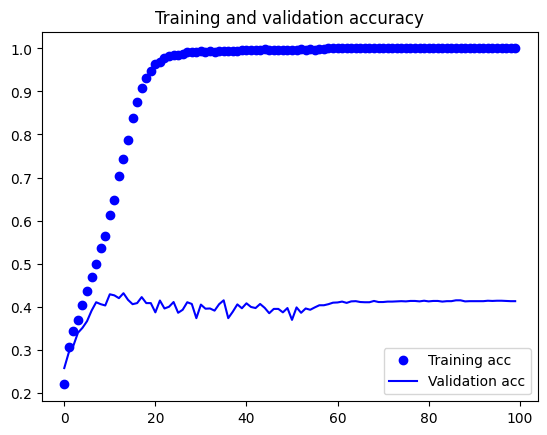

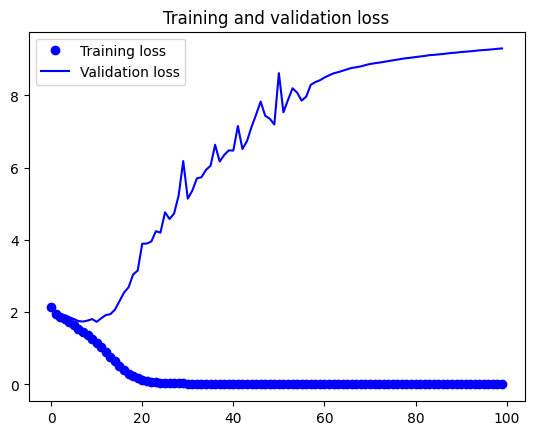

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
baseline_model.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/Baseline_Model.keras')

### Smaller_Model




Model 1 in report


From Baseline_Model
1. Removed one convolutional layer and one max pooling layer to reduce the depth of the network.

2. Reduced the number of filters in the first convolutional layer to 32 and in the second convolutional layer to 64.

3. Reduced the size of the dense layer to 128.

4. Reduced epochs to 60

In [ ]:
# Build the Model
img_size = 150

smaller_model = models.Sequential()
smaller_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
smaller_model.add(layers.MaxPooling2D((2, 2)))
smaller_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
smaller_model.add(layers.MaxPooling2D((2, 2)))
smaller_model.add(layers.Flatten())
smaller_model.add(layers.Dense(128, activation='relu'))
smaller_model.add(layers.Dense(10, activation='softmax'))

smaller_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
smaller_model.compile(loss = "categorical_crossentropy",
                       optimizer=optimizers.RMSprop(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [ ]:
# Train the Model
history = smaller_model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 3121s 8s/step - loss: 2.2053 - acc: 0.1972 - val_loss: 2.0995 - val_acc: 0.2395
Epoch 2/60
375/375 [==============================] - 47s 127ms/step - loss: 1.9814 - acc: 0.2920 - val_loss: 2.0014 - val_acc: 0.2870
Epoch 3/60
375/375 [==============================] - 39s 105ms/step - loss: 1.8718 - acc: 0.3376 - val_loss: 1.9585 - val_acc: 0.3150
Epoch 4/60
375/375 [==============================] - 42s 112ms/step - loss: 1.7885 - acc: 0.3820 - val_loss: 1.9635 - val_acc: 0.3040
Epoch 5/60
375/375 [==============================] - 39s 103ms/step - loss: 1.7152 - acc: 0.4177 - val_loss: 1.9690 - val_acc: 0.3230
Epoch 6/60
375/375 [==============================] - 39s 104ms/step - loss: 1.6323 - acc: 0.4465 - val_loss: 1.9233 - val_acc: 0.3385
Epoch 7/60
375/375 [==============================] - 41s 111ms/step - loss: 1.5606 - acc: 0.4695 - val_loss: 1.9219 - val_acc: 0.3410
Epoch 8/60
375/375 [==============================] - 39

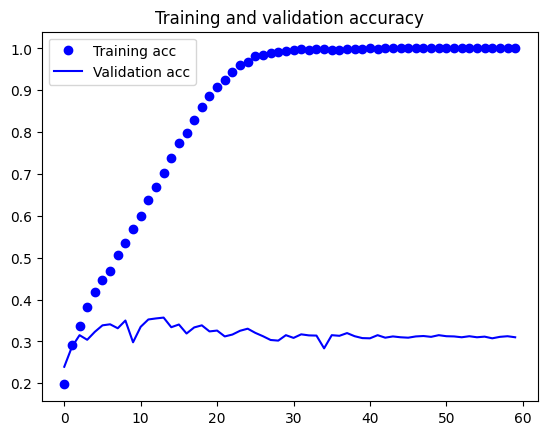

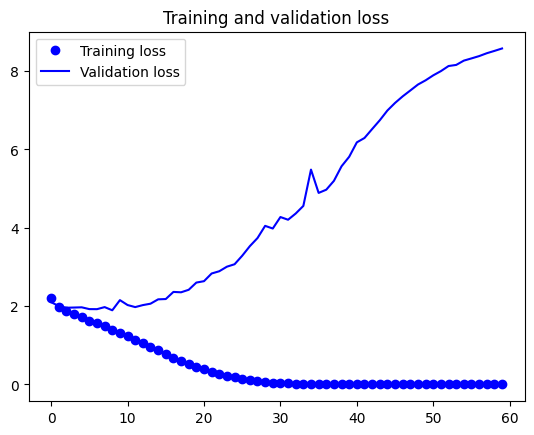

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
smaller_model.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/Smaller_Model.keras')

### Smaller_Model_2

From Baseline_Model
1. Reduced the number of filters in all the convolutional to 16, 32, 64, 64 respectively

2. Reduced the size of the dense layer to 256.

3. Reduced epochs to 60

In [ ]:
img_size = 150

smaller_model_2 = models.Sequential()
smaller_model_2.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
smaller_model_2.add(layers.MaxPooling2D((2, 2)))
smaller_model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
smaller_model_2.add(layers.MaxPooling2D((2, 2)))
smaller_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
smaller_model_2.add(layers.MaxPooling2D((2, 2)))
smaller_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
smaller_model_2.add(layers.MaxPooling2D((2, 2)))
smaller_model_2.add(layers.Flatten())
smaller_model_2.add(layers.Dense(256, activation='relu'))
smaller_model_2.add(layers.Dense(10, activation='softmax'))

smaller_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
smaller_model_2.compile(loss = "categorical_crossentropy",
                       optimizer=optimizers.RMSprop(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [ ]:
history = smaller_model_2.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 44s 113ms/step - loss: 2.2176 - acc: 0.1748 - val_loss: 2.1491 - val_acc: 0.2230
Epoch 2/60
375/375 [==============================] - 39s 104ms/step - loss: 2.0518 - acc: 0.2617 - val_loss: 2.0407 - val_acc: 0.2735
Epoch 3/60
375/375 [==============================] - 37s 98ms/step - loss: 1.9711 - acc: 0.2993 - val_loss: 2.0196 - val_acc: 0.2760
Epoch 4/60
375/375 [==============================] - 39s 104ms/step - loss: 1.9147 - acc: 0.3231 - val_loss: 2.0316 - val_acc: 0.2780
Epoch 5/60
375/375 [==============================] - 39s 103ms/step - loss: 1.8669 - acc: 0.3419 - val_loss: 1.9371 - val_acc: 0.3145
Epoch 6/60
375/375 [==============================] - 39s 104ms/step - loss: 1.8155 - acc: 0.3640 - val_loss: 1.9344 - val_acc: 0.3145
Epoch 7/60
375/375 [==============================] - 38s 101ms/step - loss: 1.7689 - acc: 0.3815 - val_loss: 1.9053 - val_acc: 0.3440
Epoch 8/60
375/375 [==============================] - 37

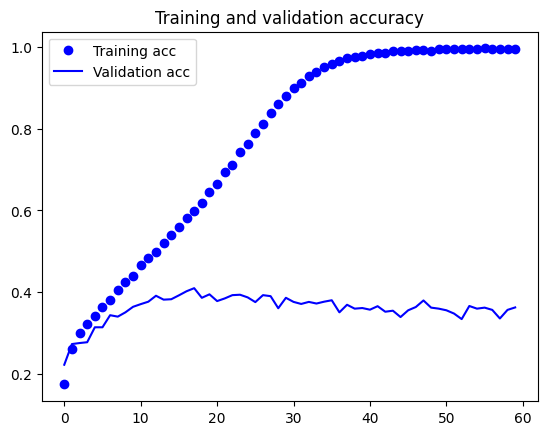

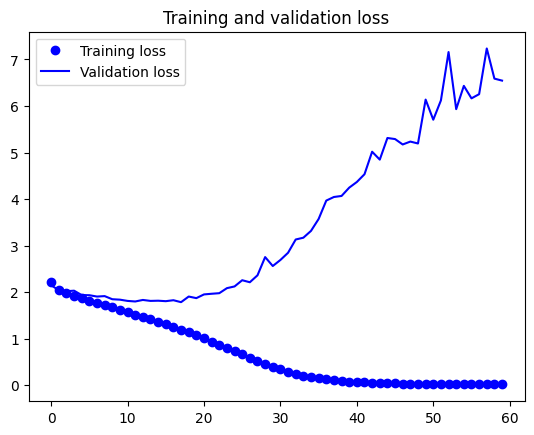

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
smaller_model_2.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/Smaller_Model_2.keras')

### L2 regularizer model


From Small_Model_2
1. Add l2 Regularizers(0.001) to all convolutional layers

In [ ]:
img_size = 150

l2_regularizer_model = models.Sequential()
l2_regularizer_model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3), kernel_regularizer=regularizers.l2(0.001)) )
l2_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l2_regularizer_model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l2_regularizer_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l2_regularizer_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l2_regularizer_model.add(layers.Flatten())
l2_regularizer_model.add(layers.Dense(256, activation='relu'))
l2_regularizer_model.add(layers.Dense(10, activation='softmax'))

l2_regularizer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
l2_regularizer_model.compile(loss = "categorical_crossentropy",
                       optimizer=optimizers.RMSprop(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [ ]:
history = l2_regularizer_model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 4464s 12s/step - loss: 2.3023 - acc: 0.1996 - val_loss: 2.2270 - val_acc: 0.2210
Epoch 2/60
375/375 [==============================] - 38s 100ms/step - loss: 2.1282 - acc: 0.2775 - val_loss: 2.1307 - val_acc: 0.2760
Epoch 3/60
375/375 [==============================] - 37s 97ms/step - loss: 2.0491 - acc: 0.3036 - val_loss: 2.1356 - val_acc: 0.2845
Epoch 4/60
375/375 [==============================] - 40s 107ms/step - loss: 1.9862 - acc: 0.3312 - val_loss: 2.0569 - val_acc: 0.3040
Epoch 5/60
375/375 [==============================] - 36s 97ms/step - loss: 1.9339 - acc: 0.3569 - val_loss: 2.0745 - val_acc: 0.2995
Epoch 6/60
375/375 [==============================] - 36s 97ms/step - loss: 1.8834 - acc: 0.3803 - val_loss: 1.9915 - val_acc: 0.3520
Epoch 7/60
375/375 [==============================] - 37s 99ms/step - loss: 1.8328 - acc: 0.3921 - val_loss: 1.9658 - val_acc: 0.3515
Epoch 8/60
375/375 [==============================] - 37s 1

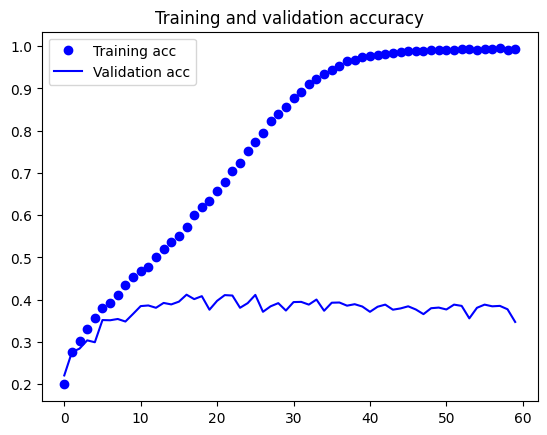

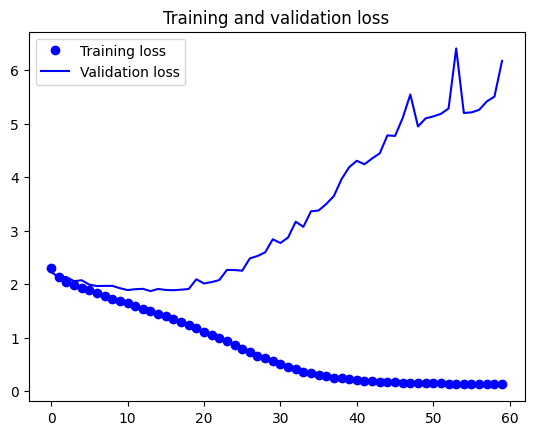

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
l2_regularizer_model.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/l2_regularizer_model.keras')

### L1 regularizer model


Model 2 in report

From Small_Model_2
1. Add l1 Regularizers(0.001) to all convolutional layers

In [ ]:
img_size = 150

l1_regularizer_model = models.Sequential()
l1_regularizer_model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3), kernel_regularizer=regularizers.l1(0.001)) )
l1_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l1_regularizer_model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
l1_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l1_regularizer_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
l1_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l1_regularizer_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
l1_regularizer_model.add(layers.MaxPooling2D((2, 2)))
l1_regularizer_model.add(layers.Flatten())
l1_regularizer_model.add(layers.Dense(256, activation='relu'))
l1_regularizer_model.add(layers.Dense(10, activation='softmax'))

l1_regularizer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
l1_regularizer_model.compile(loss = "categorical_crossentropy",
                       optimizer=optimizers.RMSprop(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [ ]:
history = l1_regularizer_model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 2907s 8s/step - loss: 4.0609 - acc: 0.1964 - val_loss: 3.6246 - val_acc: 0.2155
Epoch 2/60
375/375 [==============================] - 36s 97ms/step - loss: 3.3285 - acc: 0.2511 - val_loss: 3.1990 - val_acc: 0.2605
Epoch 3/60
375/375 [==============================] - 36s 95ms/step - loss: 3.0290 - acc: 0.2864 - val_loss: 3.0368 - val_acc: 0.2720
Epoch 4/60
375/375 [==============================] - 36s 95ms/step - loss: 2.8684 - acc: 0.3097 - val_loss: 2.9393 - val_acc: 0.2585
Epoch 5/60
375/375 [==============================] - 36s 95ms/step - loss: 2.7475 - acc: 0.3324 - val_loss: 2.7942 - val_acc: 0.3025
Epoch 6/60
375/375 [==============================] - 36s 96ms/step - loss: 2.6494 - acc: 0.3432 - val_loss: 2.8214 - val_acc: 0.2700
Epoch 7/60
375/375 [==============================] - 35s 94ms/step - loss: 2.5708 - acc: 0.3553 - val_loss: 2.7034 - val_acc: 0.3060
Epoch 8/60
375/375 [==============================] - 35s 94ms

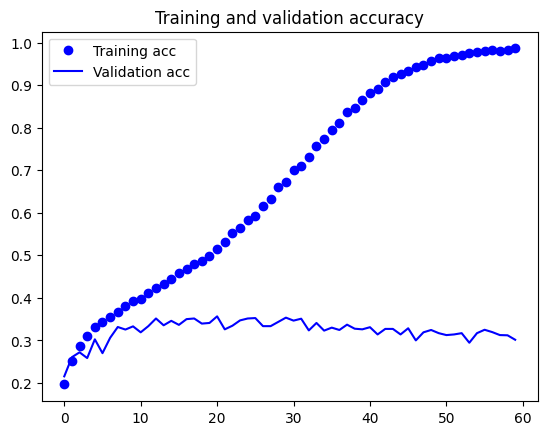

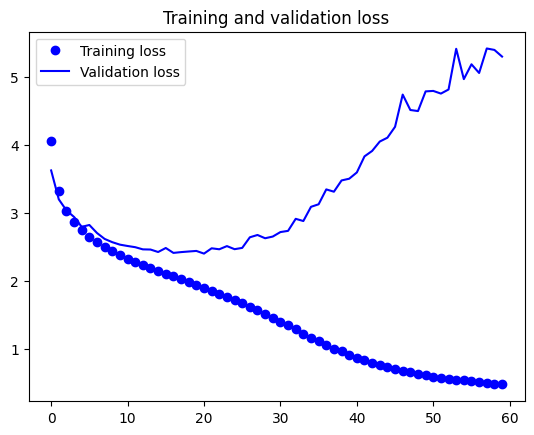

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
l1_regularizer_model.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/l1_regularizer_model.keras')

### Model 2

Model 3 in report

From Baseline_model
1. Change loss function to sparse_categorical_crossentropy

In [ ]:
img_size = 150

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape = (img_size, img_size, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model_2.compile(loss = "sparse_categorical_crossentropy",
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model_2.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 2760s 7s/step - loss: 2.1072 - acc: 0.2393 - val_loss: 2.0598 - val_acc: 0.2600
Epoch 2/60
375/375 [==============================] - 40s 108ms/step - loss: 1.9460 - acc: 0.3059 - val_loss: 2.0073 - val_acc: 0.2900
Epoch 3/60
375/375 [==============================] - 43s 114ms/step - loss: 1.8555 - acc: 0.3476 - val_loss: 1.9500 - val_acc: 0.3305
Epoch 4/60
375/375 [==============================] - 40s 106ms/step - loss: 1.7719 - acc: 0.3803 - val_loss: 1.8798 - val_acc: 0.3460
Epoch 5/60
375/375 [==============================] - 40s 106ms/step - loss: 1.6959 - acc: 0.4064 - val_loss: 1.8760 - val_acc: 0.3555
Epoch 6/60
375/375 [==============================] - 41s 108ms/step - loss: 1.6165 - acc: 0.4412 - val_loss: 1.8234 - val_acc: 0.3810
Epoch 7/60
375/375 [==============================] - 40s 106ms/step - loss: 1.5417 - acc: 0.4653 - val_loss: 1.7639 - val_acc: 0.3950
Epoch 8/60
375/375 [==============================] - 38

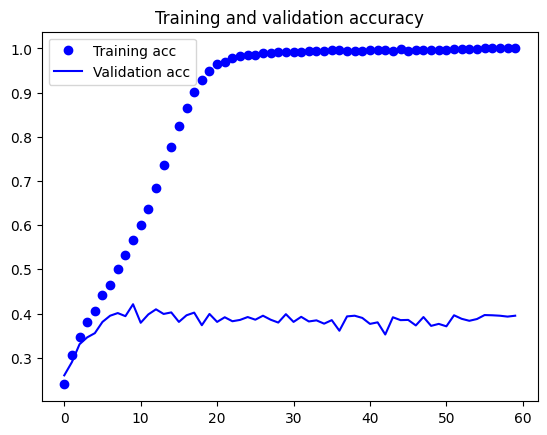

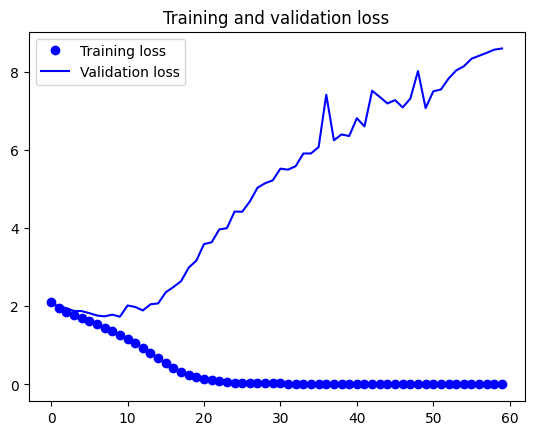

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_2.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/model_2.keras')

### Model 2.1 (Adam Optimizer)

Model 4 in report

From Model 2
1. Change optimizer to Adam()

In [26]:
img_size = 150

model_2_adam = models.Sequential()
model_2_adam.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape = (img_size, img_size, 3)))
model_2_adam.add(layers.MaxPooling2D((2, 2)))
model_2_adam.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2_adam.add(layers.MaxPooling2D((2, 2)))
model_2_adam.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2_adam.add(layers.MaxPooling2D((2, 2)))
model_2_adam.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2_adam.add(layers.MaxPooling2D((2, 2)))
model_2_adam.add(layers.Flatten())
model_2_adam.add(layers.Dense(512, activation='relu'))
model_2_adam.add(layers.Dense(10, activation='softmax'))

model_2_adam.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [27]:
model_2_adam.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(learning_rate= 0.0001),
                metrics=['acc'])

In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [29]:
history = model_2_adam.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 34s 90ms/step - loss: 2.1114 - acc: 0.2203 - val_loss: 2.0335 - val_acc: 0.2745
Epoch 2/60
375/375 [==============================] - 33s 88ms/step - loss: 1.9252 - acc: 0.3187 - val_loss: 1.9949 - val_acc: 0.3015
Epoch 3/60
375/375 [==============================] - 33s 88ms/step - loss: 1.7983 - acc: 0.3733 - val_loss: 1.9230 - val_acc: 0.3350
Epoch 4/60
375/375 [==============================] - 33s 87ms/step - loss: 1.6884 - acc: 0.4155 - val_loss: 1.7745 - val_acc: 0.3835
Epoch 5/60
375/375 [==============================] - 34s 91ms/step - loss: 1.5810 - acc: 0.4528 - val_loss: 1.7484 - val_acc: 0.4075
Epoch 6/60
375/375 [==============================] - 36s 96ms/step - loss: 1.4803 - acc: 0.4865 - val_loss: 1.7061 - val_acc: 0.4150
Epoch 7/60
375/375 [==============================] - 37s 99ms/step - loss: 1.3775 - acc: 0.5277 - val_loss: 1.6794 - val_acc: 0.4355
Epoch 8/60
375/375 [==============================] - 33s 87ms

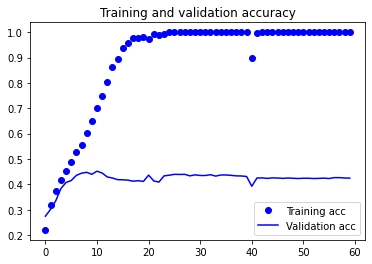

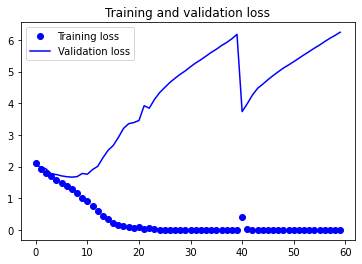

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
model_2_adam.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/model_2.1.keras')

### Model 2.2

Model 5 in report

From Model 2.1
1. Add Dropout(0.5) before last layer

In [32]:
img_size = 150

model_2_dropout = models.Sequential()
model_2_dropout.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape = (img_size, img_size, 3)))
model_2_dropout.add(layers.MaxPooling2D((2, 2)))
model_2_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2_dropout.add(layers.MaxPooling2D((2, 2)))
model_2_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2_dropout.add(layers.MaxPooling2D((2, 2)))
model_2_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2_dropout.add(layers.MaxPooling2D((2, 2)))
model_2_dropout.add(layers.Flatten())
model_2_dropout.add(layers.Dense(512, activation='relu'))
model_2_dropout.add(Dropout(0.5))  # Dropout
model_2_dropout.add(layers.Dense(10, activation='softmax'))

model_2_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [33]:

model_2_dropout.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(learning_rate= 0.0001),
                metrics=['acc'])

In [34]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [35]:
history = model_2_dropout.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 44s 113ms/step - loss: 2.1793 - acc: 0.1968 - val_loss: 2.0854 - val_acc: 0.2665
Epoch 2/60
375/375 [==============================] - 35s 92ms/step - loss: 1.9944 - acc: 0.2881 - val_loss: 1.9555 - val_acc: 0.3015
Epoch 3/60
375/375 [==============================] - 34s 90ms/step - loss: 1.8833 - acc: 0.3387 - val_loss: 1.8781 - val_acc: 0.3400
Epoch 4/60
375/375 [==============================] - 34s 92ms/step - loss: 1.7710 - acc: 0.3813 - val_loss: 1.8309 - val_acc: 0.3500
Epoch 5/60
375/375 [==============================] - 37s 99ms/step - loss: 1.6867 - acc: 0.4133 - val_loss: 1.7753 - val_acc: 0.3885
Epoch 6/60
375/375 [==============================] - 42s 112ms/step - loss: 1.5913 - acc: 0.4520 - val_loss: 1.7305 - val_acc: 0.4080
Epoch 7/60
375/375 [==============================] - 37s 98ms/step - loss: 1.5067 - acc: 0.4836 - val_loss: 1.6817 - val_acc: 0.4295
Epoch 8/60
375/375 [==============================] - 34s 91

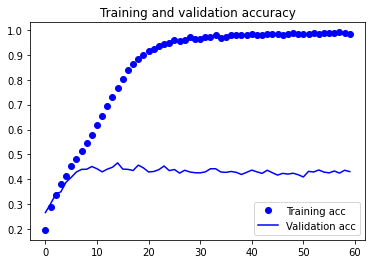

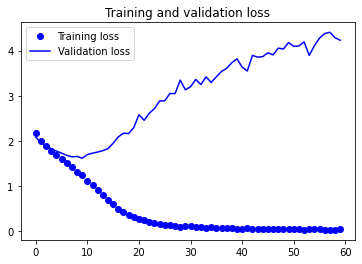

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
model_2_dropout.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/model_2.2.keras')

### Model 3

Model 6 in report

From Model 2.2
1. Increase the number of filters in convolutional layers
2. Add convolutional layers

In [30]:
img_size = 150

model_3 = models.Sequential()
model_3.add(layers.Conv2D(64, (3, 3), activation='relu',
                          input_shape = (img_size, img_size, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(Dropout(0.5)) 
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 17, 17, 256)     

In [31]:
model_3.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(learning_rate=0.0001),
                metrics=['acc'])

In [32]:
history = model_3.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 39s 102ms/step - loss: 2.2055 - acc: 0.1813 - val_loss: 2.1396 - val_acc: 0.2150
Epoch 2/60
375/375 [==============================] - 38s 102ms/step - loss: 2.0607 - acc: 0.2523 - val_loss: 2.0392 - val_acc: 0.2700
Epoch 3/60
375/375 [==============================] - 40s 106ms/step - loss: 1.9892 - acc: 0.2907 - val_loss: 1.9589 - val_acc: 0.3060
Epoch 4/60
375/375 [==============================] - 40s 106ms/step - loss: 1.8746 - acc: 0.3404 - val_loss: 1.9256 - val_acc: 0.3205
Epoch 5/60
375/375 [==============================] - 40s 106ms/step - loss: 1.7990 - acc: 0.3696 - val_loss: 1.8009 - val_acc: 0.3630
Epoch 6/60
375/375 [==============================] - 41s 109ms/step - loss: 1.7122 - acc: 0.3957 - val_loss: 1.7509 - val_acc: 0.3835
Epoch 7/60
375/375 [==============================] - 40s 108ms/step - loss: 1.6246 - acc: 0.4304 - val_loss: 1.7607 - val_acc: 0.3780
Epoch 8/60
375/375 [==============================] - 4

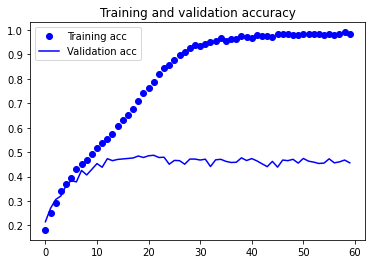

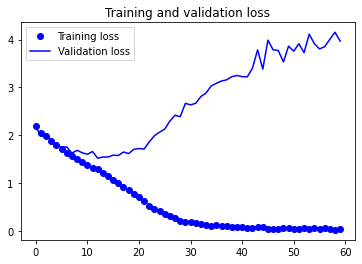

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
model_3.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/model_3.keras')

### Model 3.1

From Model 3
1. Add convolutional layers
2. rearrange Maxpooling
3. Increase the number of filters in convolutional layers

In [ ]:
img_size = 150

bigger_model_3 = models.Sequential()
bigger_model_3.add(layers.Conv2D(64, (3, 3), activation='relu',
                      input_shape = (img_size, img_size, 3)))
bigger_model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
bigger_model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
bigger_model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Conv2D(512, (3, 3), activation='relu'))
bigger_model_3.add(layers.Conv2D(512, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Flatten())
bigger_model_3.add(layers.Dense(512, activation='relu'))
bigger_model_3.add(layers.Dense(10, activation='softmax'))

bigger_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 128)       0         
 g2D)                                                   

In [ ]:
bigger_model_3.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = bigger_model_3.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 1925s 5s/step - loss: 2.3042 - acc: 0.0937 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/60
375/375 [==============================] - 45s 119ms/step - loss: 2.3029 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/60
375/375 [==============================] - 41s 110ms/step - loss: 2.3028 - acc: 0.0904 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/60
375/375 [==============================] - 43s 114ms/step - loss: 2.3029 - acc: 0.0917 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/60
375/375 [==============================] - 42s 111ms/step - loss: 2.3029 - acc: 0.0955 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/60
375/375 [==============================] - 43s 115ms/step - loss: 2.3029 - acc: 0.0937 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/60
375/375 [==============================] - 42s 111ms/step - loss: 2.3029 - acc: 0.0945 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/60
375/375 [==============================] - 43

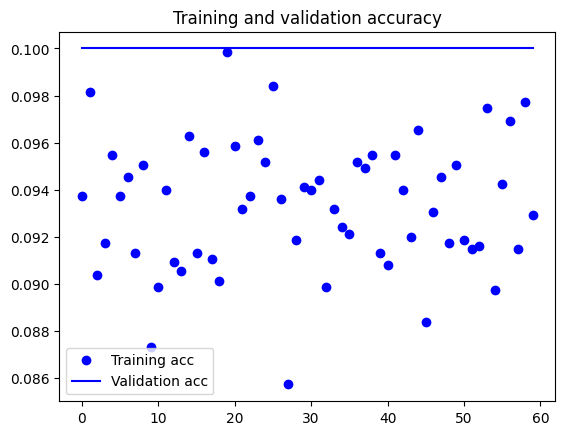

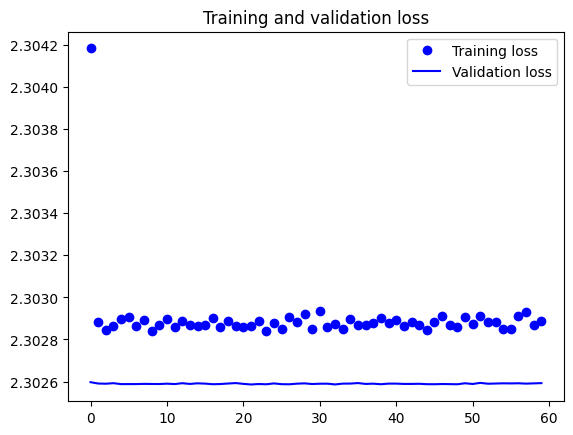

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 3.2

From Model 3
1. Increase the number of filters in convolutional layers


In [ ]:
img_size = 150

bigger_model_3 = models.Sequential()
bigger_model_3.add(layers.Conv2D(64, (3, 3), activation='relu',
                      input_shape = (img_size, img_size, 3)))
bigger_model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Conv2D(512, (3, 3), activation='relu'))
bigger_model_3.add(layers.MaxPooling2D((2, 2)))
bigger_model_3.add(layers.Flatten())
bigger_model_3.add(layers.Dense(512, activation='relu'))
bigger_model_3.add(layers.Dense(10, activation='softmax'))

bigger_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 33, 33, 256)      

In [ ]:
bigger_model_3.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = bigger_model_3.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 53s 129ms/step - loss: 2.2937 - acc: 0.1168 - val_loss: 2.2138 - val_acc: 0.1855
Epoch 2/60
375/375 [==============================] - 48s 127ms/step - loss: 2.1419 - acc: 0.2116 - val_loss: 2.1742 - val_acc: 0.1910
Epoch 3/60
375/375 [==============================] - 49s 130ms/step - loss: 2.0500 - acc: 0.2624 - val_loss: 2.0448 - val_acc: 0.2740
Epoch 4/60
375/375 [==============================] - 49s 130ms/step - loss: 1.9023 - acc: 0.3112 - val_loss: 1.9676 - val_acc: 0.2795
Epoch 5/60
375/375 [==============================] - 49s 130ms/step - loss: 1.7861 - acc: 0.3572 - val_loss: 1.8852 - val_acc: 0.3235
Epoch 6/60
375/375 [==============================] - 49s 129ms/step - loss: 1.6568 - acc: 0.4085 - val_loss: 1.8156 - val_acc: 0.3510
Epoch 7/60
375/375 [==============================] - 49s 130ms/step - loss: 1.4976 - acc: 0.4728 - val_loss: 1.8526 - val_acc: 0.3390
Epoch 8/60
375/375 [==============================] - 4

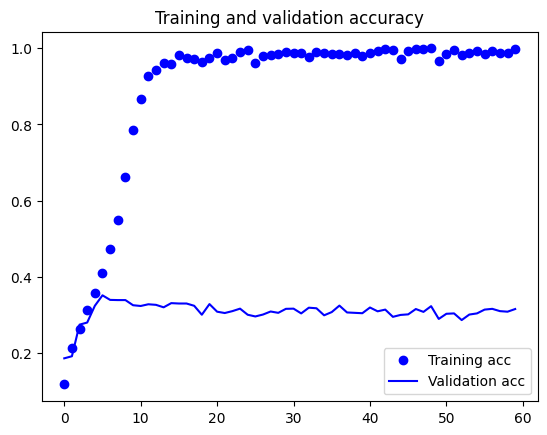

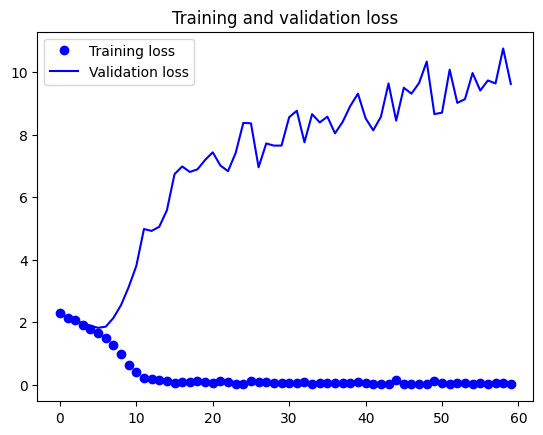

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 3.3

Model 7 in report

From Model 3
1. Add Batch Normalization


In [20]:
model_3_3 = models.Sequential()
model_3_3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_3_3.add(layers.MaxPooling2D((2, 2)))
model_3_3.add(BatchNormalization())
model_3_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3_3.add(layers.MaxPooling2D((2, 2)))
model_3_3.add(BatchNormalization())
model_3_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3_3.add(layers.MaxPooling2D((2, 2)))
model_3_3.add(BatchNormalization())
model_3_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3_3.add(layers.MaxPooling2D((2, 2)))
model_3_3.add(BatchNormalization())
model_3_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3_3.add(layers.MaxPooling2D((2, 2)))
model_3_3.add(BatchNormalization())
model_3_3.add(layers.Flatten())
model_3_3.add(layers.Dense(512, activation='relu'))
model_3_3.add(Dropout(0.5))
model_3_3.add(layers.Dense(10, activation='softmax'))

model_3_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                      

In [21]:
model_3_3.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(learning_rate= 0.0001),
                metrics=['acc'])

In [22]:
history = model_3_3.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 42s 108ms/step - loss: 2.4594 - acc: 0.2351 - val_loss: 2.5973 - val_acc: 0.1470
Epoch 2/60
375/375 [==============================] - 41s 109ms/step - loss: 1.9822 - acc: 0.3492 - val_loss: 1.8547 - val_acc: 0.3700
Epoch 3/60
375/375 [==============================] - 42s 111ms/step - loss: 1.7711 - acc: 0.3960 - val_loss: 1.7793 - val_acc: 0.3990
Epoch 4/60
375/375 [==============================] - 42s 111ms/step - loss: 1.5651 - acc: 0.4644 - val_loss: 1.7845 - val_acc: 0.3985
Epoch 5/60
375/375 [==============================] - 42s 112ms/step - loss: 1.4051 - acc: 0.5211 - val_loss: 1.6906 - val_acc: 0.4320
Epoch 6/60
375/375 [==============================] - 42s 112ms/step - loss: 1.2700 - acc: 0.5589 - val_loss: 1.6956 - val_acc: 0.4420
Epoch 7/60
375/375 [==============================] - 42s 111ms/step - loss: 1.1176 - acc: 0.6191 - val_loss: 1.7135 - val_acc: 0.4420
Epoch 8/60
375/375 [==============================] - 4

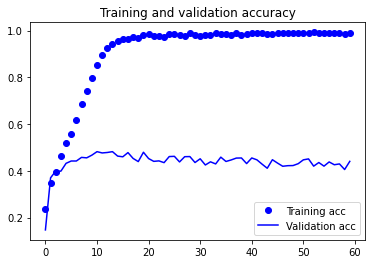

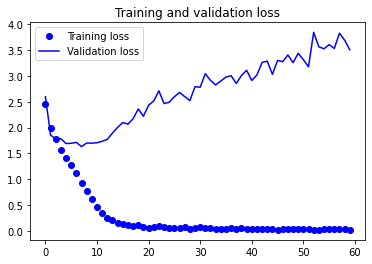

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 3.4

Model 8 in report

From Model 3.3
1. Increase learning rate to 0.001

In [7]:
model_3_4 = models.Sequential()
model_3_4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_3_4.add(layers.MaxPooling2D((2, 2)))
model_3_4.add(BatchNormalization())
model_3_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3_4.add(layers.MaxPooling2D((2, 2)))
model_3_4.add(BatchNormalization())
model_3_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3_4.add(layers.MaxPooling2D((2, 2)))
model_3_4.add(BatchNormalization())
model_3_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3_4.add(layers.MaxPooling2D((2, 2)))
model_3_4.add(BatchNormalization())
model_3_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3_4.add(layers.MaxPooling2D((2, 2)))
model_3_4.add(BatchNormalization())
model_3_4.add(layers.Flatten())
model_3_4.add(layers.Dense(512, activation='relu'))
model_3_4.add(Dropout(0.5))
model_3_4.add(layers.Dense(10, activation='softmax'))

model_3_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                      

In [28]:
model_3_4.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model_3_4.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 1960s 5s/step - loss: 2.8295 - acc: 0.2201 - val_loss: 2.5973 - val_acc: 0.1745
Epoch 2/60
375/375 [==============================] - 43s 114ms/step - loss: 2.0710 - acc: 0.3109 - val_loss: 2.3185 - val_acc: 0.2860
Epoch 3/60
375/375 [==============================] - 39s 104ms/step - loss: 1.7832 - acc: 0.3901 - val_loss: 3.8072 - val_acc: 0.1525
Epoch 4/60
375/375 [==============================] - 40s 107ms/step - loss: 1.6300 - acc: 0.4368 - val_loss: 2.0092 - val_acc: 0.3510
Epoch 5/60
375/375 [==============================] - 40s 105ms/step - loss: 1.5105 - acc: 0.4715 - val_loss: 1.8510 - val_acc: 0.3800
Epoch 6/60
375/375 [==============================] - 43s 114ms/step - loss: 1.4243 - acc: 0.4999 - val_loss: 1.9477 - val_acc: 0.3760
Epoch 7/60
375/375 [==============================] - 41s 109ms/step - loss: 1.3498 - acc: 0.5269 - val_loss: 1.7015 - val_acc: 0.4445
Epoch 8/60
375/375 [==============================] - 40

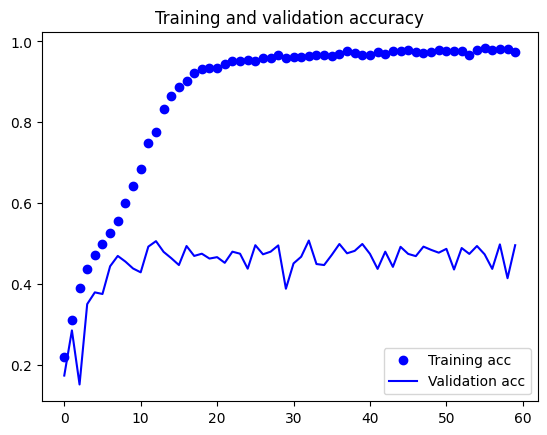

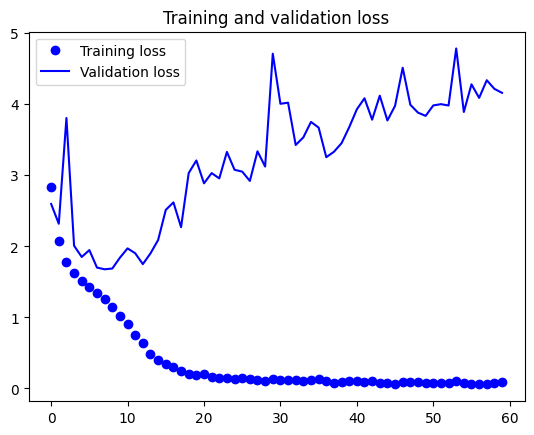

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_3_4.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/model_3.4.keras')

### Model 4

Model 9 in report

From Model 3.3
1. Apply data augmentation
2. Add Convolutional Layer


In [21]:
img_size = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


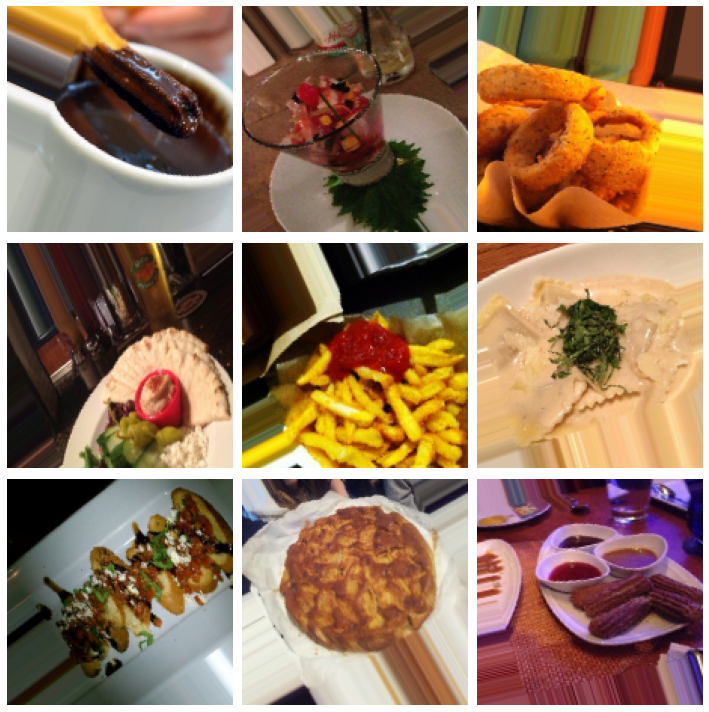

In [22]:
images, labels = next(train_generator)

# Select 9 random images from the batch
random_indices = np.random.choice(images.shape[0], size=9, replace=False)
selected_images = images[random_indices]

# Plot the images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for img, ax in zip(selected_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(BatchNormalization())
model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(BatchNormalization())
model_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(BatchNormalization())
model_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(BatchNormalization())
model_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(BatchNormalization())
model_4.add(layers.Flatten())
model_4.add(layers.Dense(512, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(layers.Dense(10, activation='softmax'))

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 73, 73, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 128)     

In [ ]:
model_4.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model_4.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=60,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 1949s 5s/step - loss: 3.1506 - acc: 0.1511 - val_loss: 2.7073 - val_acc: 0.2070
Epoch 2/60
375/375 [==============================] - 98s 261ms/step - loss: 2.3632 - acc: 0.2123 - val_loss: 2.3941 - val_acc: 0.1785
Epoch 3/60
375/375 [==============================] - 97s 258ms/step - loss: 2.0791 - acc: 0.2612 - val_loss: 2.6666 - val_acc: 0.2050
Epoch 4/60
375/375 [==============================] - 94s 252ms/step - loss: 1.9509 - acc: 0.3073 - val_loss: 2.0585 - val_acc: 0.2930
Epoch 5/60
375/375 [==============================] - 91s 243ms/step - loss: 1.8916 - acc: 0.3240 - val_loss: 2.0672 - val_acc: 0.2790
Epoch 6/60
375/375 [==============================] - 92s 244ms/step - loss: 1.8193 - acc: 0.3467 - val_loss: 1.8741 - val_acc: 0.3465
Epoch 7/60
375/375 [==============================] - 90s 239ms/step - loss: 1.7445 - acc: 0.3836 - val_loss: 2.5830 - val_acc: 0.1475
Epoch 8/60
375/375 [==============================] - 92

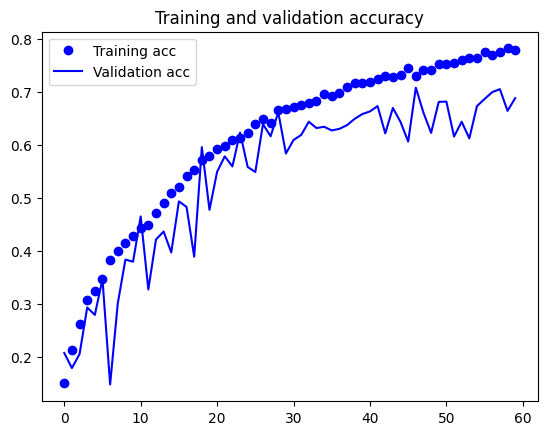

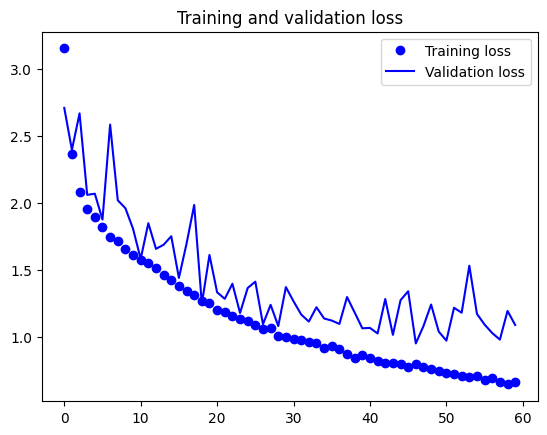

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_4.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/model_4.keras')

### Model 4.1

From Model 4
1. Increase image size
2. Add new layers
3. Increase epochs to 80

In [11]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [12]:
model_4_1 = models.Sequential()
model_4_1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_4_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4_1.add(layers.MaxPooling2D((2, 2)))
model_4_1.add(BatchNormalization())
model_4_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_1.add(layers.MaxPooling2D((2, 2)))
model_4_1.add(BatchNormalization())
model_4_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_1.add(layers.MaxPooling2D((2, 2)))
model_4_1.add(BatchNormalization())
model_4_1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_1.add(layers.MaxPooling2D((2, 2)))
model_4_1.add(BatchNormalization())
model_4_1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_1.add(layers.MaxPooling2D((2, 2)))
model_4_1.add(BatchNormalization())
model_4_1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_1.add(layers.MaxPooling2D((2, 2)))
model_4_1.add(BatchNormalization())
model_4_1.add(layers.Flatten())
model_4_1.add(layers.Dense(512, activation='relu'))
model_4_1.add(Dropout(0.5))
model_4_1.add(layers.Dense(10, activation='softmax'))

model_4_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_26 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 110, 110, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 128)     

In [ ]:
model_4_1.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


In [ ]:
history = model_4_1.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=80,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/80
375/375 [==============================] - 103s 265ms/step - loss: 2.4880 - acc: 0.1788 - val_loss: 2.3115 - val_acc: 0.2145
Epoch 2/80
375/375 [==============================] - 99s 265ms/step - loss: 2.1834 - acc: 0.2357 - val_loss: 2.1431 - val_acc: 0.2605
Epoch 3/80
375/375 [==============================] - 100s 267ms/step - loss: 1.9735 - acc: 0.2920 - val_loss: 2.1993 - val_acc: 0.2560
Epoch 4/80
375/375 [==============================] - 100s 268ms/step - loss: 1.8623 - acc: 0.3383 - val_loss: 1.8415 - val_acc: 0.3650
Epoch 5/80
375/375 [==============================] - 99s 265ms/step - loss: 1.7551 - acc: 0.3741 - val_loss: 1.7668 - val_acc: 0.3655
Epoch 6/80
375/375 [==============================] - 100s 266ms/step - loss: 1.6742 - acc: 0.4103 - val_loss: 1.6090 - val_acc: 0.4210
Epoch 7/80
375/375 [==============================] - 100s 266ms/step - loss: 1.5879 - acc: 0.4457 - val_loss: 1.7703 - val_acc: 0.4030
Epoch 8/80
375/375 [==============================

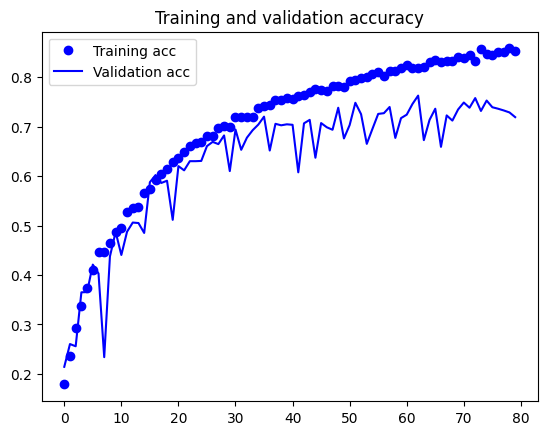

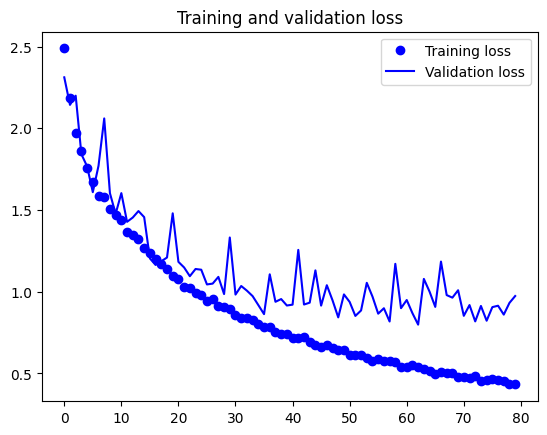

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_4_1.save('/content/drive/My Drive/Deep Learning/Assignment 1/Models/model_4.1.keras')

### Model 4.2

Model 10 in report
1. image size change came from 4.1

From Model 4.1
1. Restructure my layers
2. Increase size of dense layerr



In [5]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


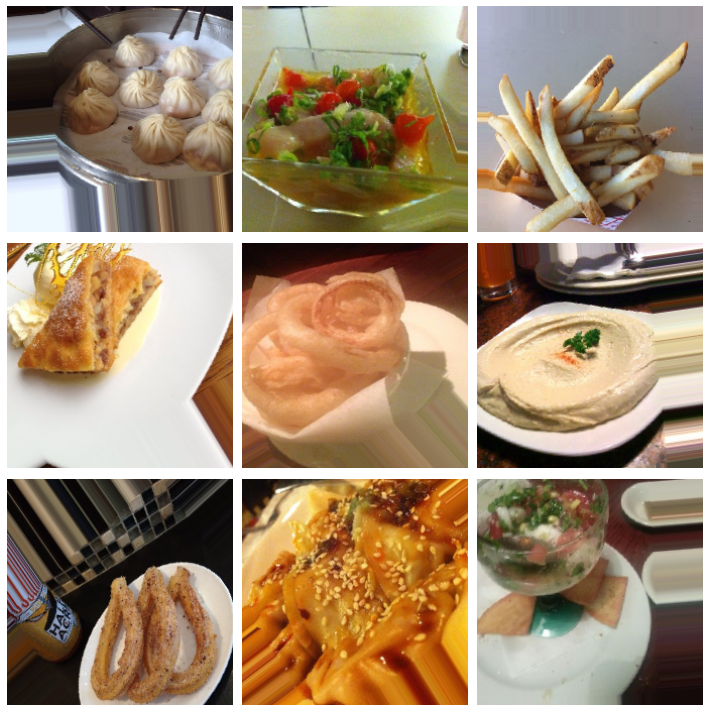

In [7]:
images, labels = next(train_generator)

# Select 9 random images from the batch
random_indices = np.random.choice(images.shape[0], size=9, replace=False)
selected_images = images[random_indices]

# Plot the images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for img, ax in zip(selected_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
model_4_2 = models.Sequential()
model_4_2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_4_2.add(layers.MaxPooling2D((2, 2)))
model_4_2.add(BatchNormalization())
model_4_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_2.add(layers.MaxPooling2D((2, 2)))
model_4_2.add(BatchNormalization())
model_4_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_2.add(layers.MaxPooling2D((2, 2)))
model_4_2.add(BatchNormalization())
model_4_2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_2.add(layers.MaxPooling2D((2, 2)))
model_4_2.add(BatchNormalization())
model_4_2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_2.add(layers.MaxPooling2D((2, 2)))
model_4_2.add(BatchNormalization())
model_4_2.add(layers.Flatten())
model_4_2.add(layers.Dense(1024, activation='relu'))
model_4_2.add(Dropout(0.5))
model_4_2.add(layers.Dense(10, activation='softmax'))

model_4_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 128)     

In [9]:
model_4_2.compile(loss = "sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=['acc'])

In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


In [11]:
history = model_4_2.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=80,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/80
375/375 [==============================] - 148s 389ms/step - loss: 3.6230 - acc: 0.1295 - val_loss: 2.5719 - val_acc: 0.1400
Epoch 2/80
375/375 [==============================] - 125s 333ms/step - loss: 2.2775 - acc: 0.1880 - val_loss: 2.1149 - val_acc: 0.2305
Epoch 3/80
375/375 [==============================] - 126s 336ms/step - loss: 2.1144 - acc: 0.2404 - val_loss: 2.0444 - val_acc: 0.2510
Epoch 4/80
375/375 [==============================] - 127s 338ms/step - loss: 2.0718 - acc: 0.2593 - val_loss: 2.0789 - val_acc: 0.2330
Epoch 5/80
375/375 [==============================] - 127s 339ms/step - loss: 1.9875 - acc: 0.2909 - val_loss: 2.5735 - val_acc: 0.1995
Epoch 6/80
375/375 [==============================] - 128s 340ms/step - loss: 1.9571 - acc: 0.3036 - val_loss: 2.0864 - val_acc: 0.2910
Epoch 7/80
375/375 [==============================] - 141s 375ms/step - loss: 1.8723 - acc: 0.3315 - val_loss: 1.9651 - val_acc: 0.2825
Epoch 8/80
375/375 [============================

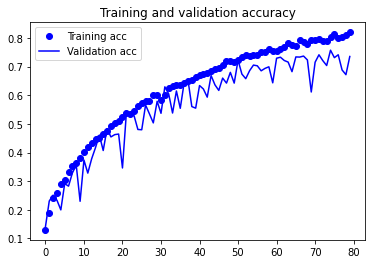

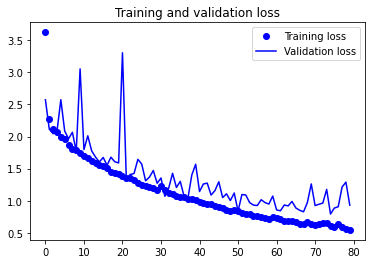

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
history_2 = model_4_2.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=30,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/30
375/375 [==============================] - 138s 367ms/step - loss: 0.5440 - acc: 0.8281 - val_loss: 0.9877 - val_acc: 0.7250
Epoch 2/30
375/375 [==============================] - 131s 349ms/step - loss: 0.5619 - acc: 0.8159 - val_loss: 0.8871 - val_acc: 0.7285
Epoch 3/30
375/375 [==============================] - 137s 366ms/step - loss: 0.5272 - acc: 0.8289 - val_loss: 0.8847 - val_acc: 0.7310
Epoch 4/30
375/375 [==============================] - 132s 352ms/step - loss: 0.5378 - acc: 0.8239 - val_loss: 0.8384 - val_acc: 0.7485
Epoch 5/30
375/375 [==============================] - 135s 358ms/step - loss: 0.5439 - acc: 0.8204 - val_loss: 0.7849 - val_acc: 0.7605
Epoch 6/30
375/375 [==============================] - 132s 352ms/step - loss: 0.5013 - acc: 0.8341 - val_loss: 0.9476 - val_acc: 0.7545
Epoch 7/30
375/375 [==============================] - 135s 361ms/step - loss: 0.5272 - acc: 0.8280 - val_loss: 1.0638 - val_acc: 0.7000
Epoch 8/30
375/375 [============================

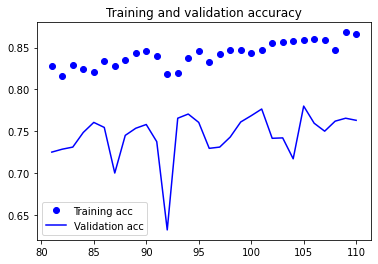

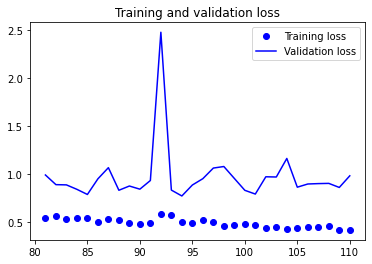

In [17]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(81, 81 + len(acc))  # Start from 81

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_4_2.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\model_4.2.keras')

### Model 4.3

Model 11 in report

From Model 4.2
1. Change Flatten layer to Global Average Pooling

In [4]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [5]:
model_4_3 = models.Sequential()
model_4_3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_4_3.add(layers.MaxPooling2D((2, 2)))
model_4_3.add(BatchNormalization())
model_4_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_3.add(layers.MaxPooling2D((2, 2)))
model_4_3.add(BatchNormalization())
model_4_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_3.add(layers.MaxPooling2D((2, 2)))
model_4_3.add(BatchNormalization())
model_4_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_3.add(layers.MaxPooling2D((2, 2)))
model_4_3.add(BatchNormalization())
model_4_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_3.add(layers.MaxPooling2D((2, 2)))
model_4_3.add(BatchNormalization())
model_4_3.add(GlobalAveragePooling2D())
model_4_3.add(layers.Dense(1024, activation='relu'))
model_4_3.add(Dropout(0.5))
model_4_3.add(layers.Dense(10, activation='softmax'))

model_4_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0

In [6]:
model_4_3.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=['acc'])


In [7]:
history = model_4_3.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=120,
                      validation_data=validation_generator,
                      validation_steps=100)

Epoch 1/120
375/375 [==============================] - 128s 334ms/step - loss: 2.3588 - acc: 0.1712 - val_loss: 2.3299 - val_acc: 0.2080
Epoch 2/120
375/375 [==============================] - 129s 342ms/step - loss: 2.1427 - acc: 0.2253 - val_loss: 2.2251 - val_acc: 0.2170
Epoch 3/120
375/375 [==============================] - 130s 347ms/step - loss: 2.0266 - acc: 0.2811 - val_loss: 2.1072 - val_acc: 0.2790
Epoch 4/120
375/375 [==============================] - 131s 348ms/step - loss: 1.9219 - acc: 0.3156 - val_loss: 2.2938 - val_acc: 0.2470
Epoch 5/120
375/375 [==============================] - 132s 351ms/step - loss: 1.8488 - acc: 0.3437 - val_loss: 2.1840 - val_acc: 0.3105
Epoch 6/120
375/375 [==============================] - 132s 351ms/step - loss: 1.7808 - acc: 0.3645 - val_loss: 2.3644 - val_acc: 0.2270
Epoch 7/120
375/375 [==============================] - 132s 351ms/step - loss: 1.7300 - acc: 0.3799 - val_loss: 2.2983 - val_acc: 0.3365
Epoch 8/120
375/375 [====================

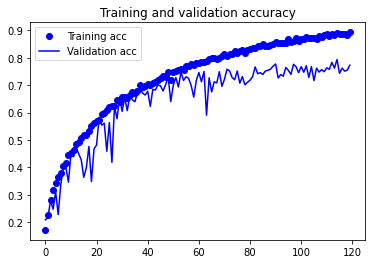

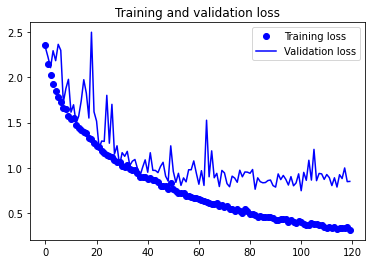

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
model_4_3.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\model_4.3.keras')

### Model 4.4

From Model 4.3
1. Add learning schedule steps_decay

In [3]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [36]:
model_4_4 = models.Sequential()
model_4_4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_4_4.add(layers.MaxPooling2D((2, 2)))
model_4_4.add(BatchNormalization())
model_4_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_4.add(layers.MaxPooling2D((2, 2)))
model_4_4.add(BatchNormalization())
model_4_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_4.add(layers.MaxPooling2D((2, 2)))
model_4_4.add(BatchNormalization())
model_4_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_4.add(layers.MaxPooling2D((2, 2)))
model_4_4.add(BatchNormalization())
model_4_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_4.add(layers.MaxPooling2D((2, 2)))
model_4_4.add(BatchNormalization())
model_4_4.add(GlobalAveragePooling2D())
model_4_4.add(layers.Dense(1024, activation='relu'))
model_4_4.add(Dropout(0.5))
model_4_4.add(layers.Dense(10, activation='softmax'))

model_4_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 111, 111, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 conv2d_34 (Conv2D)          (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 53, 53, 128)     

In [37]:
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

model_4_4.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=['acc'])

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]



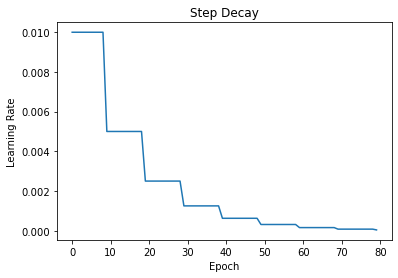

In [35]:
epochs = range(80)
learning_rates = [step_decay(epoch) for epoch in epochs]

plt.plot(epochs, learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay')
plt.show()

In [6]:
history = model_4_4.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=80,
                      validation_data=validation_generator,
                      validation_steps=100,
                      callbacks=callbacks_list)

Epoch 1/80
375/375 [==============================] - 131s 344ms/step - loss: 2.5722 - acc: 0.1405 - val_loss: 2.2298 - val_acc: 0.1725 - lr: 0.0100
Epoch 2/80
375/375 [==============================] - 129s 344ms/step - loss: 2.2519 - acc: 0.1532 - val_loss: 2.2574 - val_acc: 0.1460 - lr: 0.0100
Epoch 3/80
375/375 [==============================] - 129s 344ms/step - loss: 2.2342 - acc: 0.1568 - val_loss: 2.2764 - val_acc: 0.1290 - lr: 0.0100
Epoch 4/80
375/375 [==============================] - 130s 347ms/step - loss: 2.2414 - acc: 0.1572 - val_loss: 2.2064 - val_acc: 0.1790 - lr: 0.0100
Epoch 5/80
375/375 [==============================] - 129s 345ms/step - loss: 2.2269 - acc: 0.1611 - val_loss: 2.2877 - val_acc: 0.1710 - lr: 0.0100
Epoch 6/80
375/375 [==============================] - 129s 344ms/step - loss: 2.2198 - acc: 0.1675 - val_loss: 2.3845 - val_acc: 0.1595 - lr: 0.0100
Epoch 7/80
375/375 [==============================] - 133s 355ms/step - loss: 2.2165 - acc: 0.1848 - val_l

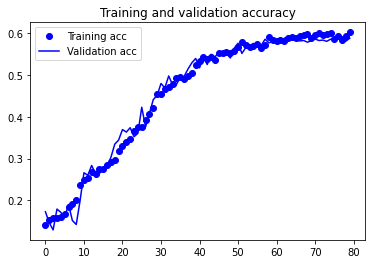

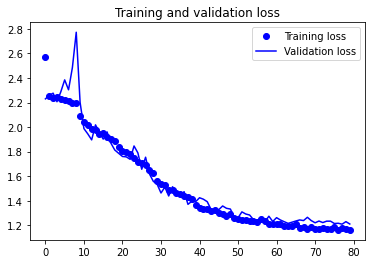

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
model_4_4.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\model_4.4.keras')

### Model 4.5

Model 12 in report

From Model 4.4
1. Change initial learning rate of step decay from 0.01 to 0.001

In [4]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [39]:
model_4_5 = models.Sequential()
model_4_5.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model_4_5.add(layers.MaxPooling2D((2, 2)))
model_4_5.add(BatchNormalization())
model_4_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_5.add(layers.MaxPooling2D((2, 2)))
model_4_5.add(BatchNormalization())
model_4_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4_5.add(layers.MaxPooling2D((2, 2)))
model_4_5.add(BatchNormalization())
model_4_5.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_5.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_5.add(layers.MaxPooling2D((2, 2)))
model_4_5.add(BatchNormalization())
model_4_5.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_5.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4_5.add(layers.MaxPooling2D((2, 2)))
model_4_5.add(BatchNormalization())
model_4_5.add(GlobalAveragePooling2D())
model_4_5.add(layers.Dense(1024, activation='relu'))
model_4_5.add(Dropout(0.5))
model_4_5.add(layers.Dense(10, activation='softmax'))

model_4_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_31 (Bat  (None, 111, 111, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_42 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 conv2d_43 (Conv2D)          (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 53, 53, 128)     

In [40]:
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

model_4_5.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=['acc'])

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

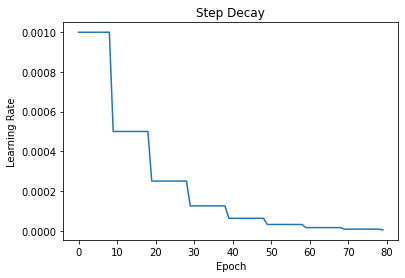

In [41]:
epochs = range(80)
learning_rates = [step_decay(epoch) for epoch in epochs]

plt.plot(epochs, learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay')
plt.show()

In [10]:
history = model_4_5.fit(train_generator,
                      steps_per_epoch=375,
                      epochs=80,
                      validation_data=validation_generator,
                      validation_steps=100,
                      callbacks=callbacks_list)

Epoch 1/80
375/375 [==============================] - 158s 415ms/step - loss: 2.3684 - acc: 0.1697 - val_loss: 2.4011 - val_acc: 0.1550 - lr: 0.0010
Epoch 2/80
375/375 [==============================] - 127s 339ms/step - loss: 2.1624 - acc: 0.2317 - val_loss: 2.4713 - val_acc: 0.2060 - lr: 0.0010
Epoch 3/80
375/375 [==============================] - 129s 342ms/step - loss: 2.0321 - acc: 0.2701 - val_loss: 2.0786 - val_acc: 0.2735 - lr: 0.0010
Epoch 4/80
375/375 [==============================] - 129s 344ms/step - loss: 1.9380 - acc: 0.3056 - val_loss: 1.8581 - val_acc: 0.3375 - lr: 0.0010
Epoch 5/80
375/375 [==============================] - 130s 345ms/step - loss: 1.8645 - acc: 0.3328 - val_loss: 2.5754 - val_acc: 0.2255 - lr: 0.0010
Epoch 6/80
375/375 [==============================] - 131s 347ms/step - loss: 1.7893 - acc: 0.3577 - val_loss: 1.8805 - val_acc: 0.3535 - lr: 0.0010
Epoch 7/80
375/375 [==============================] - 131s 347ms/step - loss: 1.7379 - acc: 0.3824 - val_l

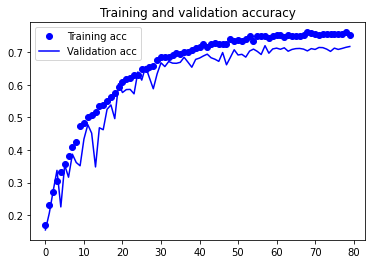

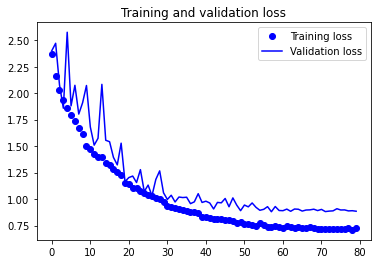

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model_4_5.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\model_4.5.keras')

#### Baseline Pre-Trained Model

Baseline Pre-Trained Model in report

Using MobileNet Without Data Augmentation

In [42]:
img_size = 224

MN_base = MobileNet(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

MN_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [43]:

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1024))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = MN_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
1/1 [==============================] - 0s 27ms/step
Found 2000 images belonging to 10 classes.
1/1 [==============================] - 0s 29ms/step
Found 500 images belonging to 10 classes.
1/1 [==============================] - 0s 30ms/step


In [44]:
print(train_features.shape)
print(train_labels.shape)

(7500, 7, 7, 1024)
(7500,)


In [45]:
train_features = np.reshape(train_features, (7500, 7 * 7 * 1024))
validation_features = np.reshape(validation_features, (2000, 7 * 7 * 1024))
test_features = np.reshape(test_features, (500, 7 * 7 * 1024))

In [46]:
baseline_pre_train_model = models.Sequential()
baseline_pre_train_model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 1024))
baseline_pre_train_model.add(layers.Dense(10, activation='softmax'))

baseline_pre_train_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               25690624  
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 25,695,754
Trainable params: 25,695,754
Non-trainable params: 0
_________________________________________________________________


In [47]:
baseline_pre_train_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [48]:

history = baseline_pre_train_model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
375/375 [==============================] - 10s 19ms/step - loss: 1.8777 - acc: 0.6561 - val_loss: 0.9114 - val_acc: 0.7205
Epoch 2/30
375/375 [==============================] - 6s 16ms/step - loss: 0.3342 - acc: 0.8829 - val_loss: 1.1987 - val_acc: 0.6845
Epoch 3/30
375/375 [==============================] - 6s 16ms/step - loss: 0.1096 - acc: 0.9623 - val_loss: 1.3580 - val_acc: 0.7070
Epoch 4/30
375/375 [==============================] - 6s 16ms/step - loss: 0.0404 - acc: 0.9871 - val_loss: 1.3083 - val_acc: 0.7410
Epoch 5/30
375/375 [==============================] - 6s 17ms/step - loss: 0.0475 - acc: 0.9843 - val_loss: 1.4652 - val_acc: 0.7435
Epoch 6/30
375/375 [==============================] - 7s 18ms/step - loss: 0.1298 - acc: 0.9637 - val_loss: 2.1554 - val_acc: 0.6740
Epoch 7/30
375/375 [==============================] - 6s 17ms/step - loss: 0.2191 - acc: 0.9391 - val_loss: 2.0310 - val_acc: 0.7175
Epoch 8/30
375/375 [==============================] - 6s 16ms/step -

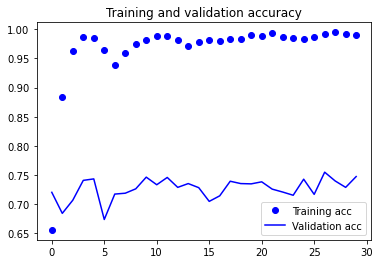

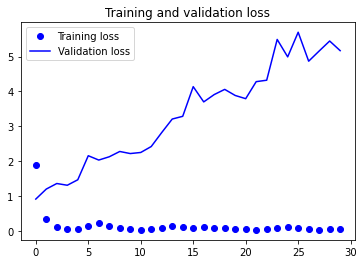

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
baseline_pre_train_model.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\baseline_pre_train_model.keras')

#### Pre-Trained Model

Using MobileNet Without Data Augmentation with dropout

In [14]:
img_size = 224

MN_base = MobileNet(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

MN_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [15]:

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1024))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = MN_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
1/1 [==============================] - 0s 25ms/step
Found 2000 images belonging to 10 classes.
1/1 [==============================] - 0s 29ms/step
Found 500 images belonging to 10 classes.
1/1 [==============================] - 0s 26ms/step


In [23]:
print(train_features.shape)
print(train_labels.shape)

(7500, 7, 7, 1024)
(7500,)


In [24]:
train_features = np.reshape(train_features, (7500, 7 * 7 * 1024))
validation_features = np.reshape(validation_features, (2000, 7 * 7 * 1024))
test_features = np.reshape(test_features, (500, 7 * 7 * 1024))

In [25]:
pre_train_model = models.Sequential()
pre_train_model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 1024))
pre_train_model.add(layers.Dropout(0.5))
pre_train_model.add(layers.Dense(10, activation='softmax'))

pre_train_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               25690624  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 25,695,754
Trainable params: 25,695,754
Non-trainable params: 0
_________________________________________________________________


In [26]:
pre_train_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [27]:

history = pre_train_model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
375/375 [==============================] - 53s 76ms/step - loss: 2.7955 - acc: 0.4745 - val_loss: 1.2207 - val_acc: 0.6200
Epoch 2/30
375/375 [==============================] - 19s 50ms/step - loss: 1.3275 - acc: 0.5664 - val_loss: 1.1177 - val_acc: 0.6685
Epoch 3/30
375/375 [==============================] - 18s 47ms/step - loss: 1.2111 - acc: 0.6095 - val_loss: 1.1251 - val_acc: 0.6800
Epoch 4/30
375/375 [==============================] - 18s 47ms/step - loss: 1.1178 - acc: 0.6329 - val_loss: 0.9588 - val_acc: 0.7100
Epoch 5/30
375/375 [==============================] - 18s 47ms/step - loss: 0.9716 - acc: 0.6796 - val_loss: 1.0687 - val_acc: 0.6945
Epoch 6/30
375/375 [==============================] - 18s 47ms/step - loss: 0.9367 - acc: 0.6947 - val_loss: 1.0030 - val_acc: 0.7025
Epoch 7/30
375/375 [==============================] - 18s 47ms/step - loss: 0.8722 - acc: 0.7175 - val_loss: 1.0429 - val_acc: 0.7225
Epoch 8/30
375/375 [==============================] - 18s 47ms

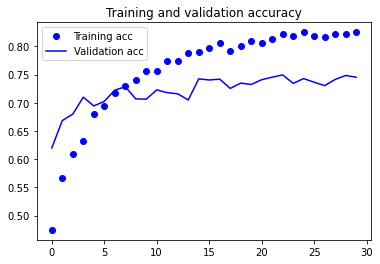

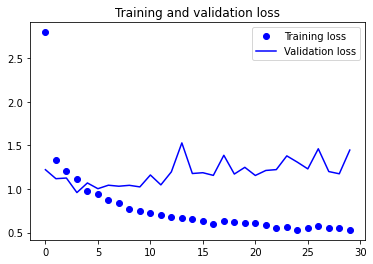

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
pre_train_model.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model.keras')

#### Pre-Trained Model 1

Using MobileNet Without Data Augmentation with Fine Tuning of the entire model

In [7]:
img_size = 224

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [12]:
MN_base = MobileNet(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

MN_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [19]:
pre_train_model_1 = models.Sequential()
pre_train_model_1.add(MN_base)
pre_train_model_1.add(layers.Flatten())
pre_train_model_1.add(layers.Dense(1024, activation='relu'))
pre_train_model_1.add(layers.Dense(10, activation='softmax'))

pre_train_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              51381248  
                                                                 
 dense_9 (Dense)             (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 54,598,474
Non-trainable params: 21,888
_________________________________________________________________


In [20]:
pre_train_model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [21]:
history = pre_train_model_1.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 120s 310ms/step - loss: 0.5809 - acc: 0.8609 - val_loss: 1.3248 - val_acc: 0.7100
Epoch 2/60
375/375 [==============================] - 116s 309ms/step - loss: 0.3959 - acc: 0.8861 - val_loss: 2.4827 - val_acc: 0.7050
Epoch 3/60
375/375 [==============================] - 116s 308ms/step - loss: 0.3536 - acc: 0.9009 - val_loss: 1.4201 - val_acc: 0.7285
Epoch 4/60
375/375 [==============================] - 116s 308ms/step - loss: 0.2989 - acc: 0.9100 - val_loss: 1.7360 - val_acc: 0.6435
Epoch 5/60
375/375 [==============================] - 116s 308ms/step - loss: 0.2475 - acc: 0.9284 - val_loss: 1.7412 - val_acc: 0.7050
Epoch 6/60
375/375 [==============================] - 116s 309ms/step - loss: 0.2658 - acc: 0.9257 - val_loss: 1.3154 - val_acc: 0.7445
Epoch 7/60
375/375 [==============================] - 117s 311ms/step - loss: 0.2057 - acc: 0.9377 - val_loss: 1.5014 - val_acc: 0.7135
Epoch 8/60
375/375 [============================

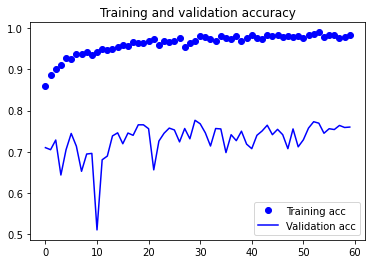

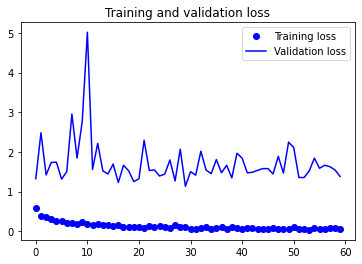

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
pre_train_model_1.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_1.keras')

#### Pre-Trained Model 2

Using MobileNet With Data Augmentation with Fine Tuning of the entire model

In [8]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [9]:
MN_base = MobileNet(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

MN_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [10]:
pre_train_model_2 = models.Sequential()
pre_train_model_2.add(MN_base)
pre_train_model_2.add(layers.Flatten())
pre_train_model_2.add(layers.Dense(1024, activation='relu'))
pre_train_model_2.add(layers.Dense(10, activation='softmax'))

pre_train_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              51381248  
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 54,598,474
Non-trainable params: 21,888
_________________________________________________________________


In [11]:
pre_train_model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [12]:
history = pre_train_model_2.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 124s 319ms/step - loss: 2.4877 - acc: 0.5343 - val_loss: 1.2845 - val_acc: 0.6470
Epoch 2/60
375/375 [==============================] - 120s 319ms/step - loss: 0.9529 - acc: 0.6876 - val_loss: 1.7126 - val_acc: 0.5670
Epoch 3/60
375/375 [==============================] - 119s 317ms/step - loss: 0.8566 - acc: 0.7216 - val_loss: 0.9914 - val_acc: 0.7055
Epoch 4/60
375/375 [==============================] - 119s 317ms/step - loss: 0.7850 - acc: 0.7431 - val_loss: 0.9183 - val_acc: 0.7400
Epoch 5/60
375/375 [==============================] - 117s 311ms/step - loss: 0.7644 - acc: 0.7601 - val_loss: 1.1104 - val_acc: 0.6850
Epoch 6/60
375/375 [==============================] - 116s 310ms/step - loss: 0.7379 - acc: 0.7627 - val_loss: 0.8530 - val_acc: 0.7395
Epoch 7/60
375/375 [==============================] - 116s 309ms/step - loss: 0.7053 - acc: 0.7820 - val_loss: 0.7924 - val_acc: 0.7550
Epoch 8/60
375/375 [============================

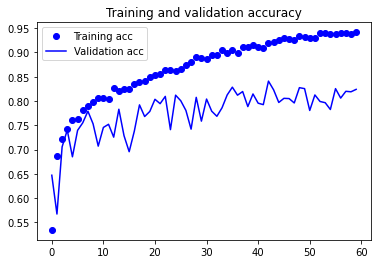

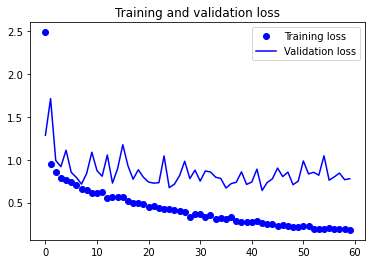

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
pre_train_model_2.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_2.keras')

#### Pre-Trained Model 3

Pre-Trained Model 1 in report

Pre-trained model with Data Augmentation

In [3]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [4]:
img_size = 224

MN_base = MobileNet(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

MN_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [5]:
pre_train_model_3 = models.Sequential()
pre_train_model_3.add(MN_base)
pre_train_model_3.add(layers.Flatten())
pre_train_model_3.add(layers.Dense(1024, activation='relu'))
pre_train_model_3.add(layers.Dense(10, activation='softmax'))

pre_train_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1024)              51381248  
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 54,598,474
Non-trainable params: 21,888
_________________________________________________________________


In [6]:
MN_base.trainable = False

In [7]:
pre_train_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1024)              51381248  
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 51,391,498
Non-trainable params: 3,228,864
_________________________________________________________________


In [8]:
pre_train_model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [9]:
history = pre_train_model_3.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 156s 410ms/step - loss: 2.4146 - acc: 0.5843 - val_loss: 0.9604 - val_acc: 0.6940
Epoch 2/60
375/375 [==============================] - 104s 277ms/step - loss: 0.8591 - acc: 0.7193 - val_loss: 0.8697 - val_acc: 0.7290
Epoch 3/60
375/375 [==============================] - 101s 269ms/step - loss: 0.7704 - acc: 0.7460 - val_loss: 0.9618 - val_acc: 0.7295
Epoch 4/60
375/375 [==============================] - 103s 275ms/step - loss: 0.7139 - acc: 0.7704 - val_loss: 0.7811 - val_acc: 0.7715
Epoch 5/60
375/375 [==============================] - 104s 276ms/step - loss: 0.6714 - acc: 0.7737 - val_loss: 0.8382 - val_acc: 0.7525
Epoch 6/60
375/375 [==============================] - 99s 263ms/step - loss: 0.6467 - acc: 0.7871 - val_loss: 0.8126 - val_acc: 0.7545
Epoch 7/60
375/375 [==============================] - 99s 264ms/step - loss: 0.6366 - acc: 0.7900 - val_loss: 0.7618 - val_acc: 0.7755
Epoch 8/60
375/375 [==============================

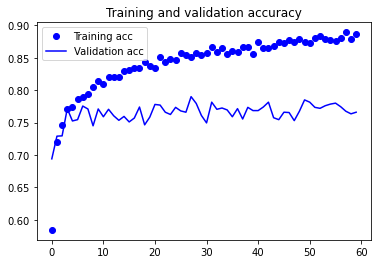

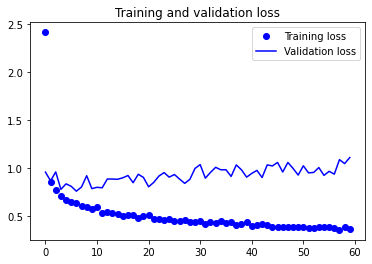

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
pre_train_model_3.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_3.keras')

#### Pre-Trained Model 4

Using VGG19 Without Data Augmentation

In [8]:
img_size = 224

vgg19 = VGG19(weights='imagenet',
            include_top=False,
            input_shape=(img_size, img_size, 3))    

vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg19.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
1/1 [==============================] - 0s 27ms/step
Found 2000 images belonging to 10 classes.
1/1 [==============================] - 0s 30ms/step
Found 500 images belonging to 10 classes.
1/1 [==============================] - 0s 24ms/step


In [27]:
print(train_features.shape)
print(train_labels.shape)

(7500, 7, 7, 512)
(7500,)


In [28]:
train_features = np.reshape(train_features, (7500, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (2000, 7 * 7 * 512))
test_features = np.reshape(test_features, (500, 7 * 7 * 512))

In [34]:
pre_train_model_4 = models.Sequential()
pre_train_model_4.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
pre_train_model_4.add(layers.Dropout(0.5))
pre_train_model_4.add(layers.Dense(10, activation='softmax'))

pre_train_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 12,850,698
Trainable params: 12,850,698
Non-trainable params: 0
_________________________________________________________________


In [35]:
pre_train_model_4.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [36]:

history = pre_train_model_4.fit(train_features, train_labels,
                    epochs=60,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/60
375/375 [==============================] - 8s 17ms/step - loss: 2.3801 - acc: 0.2367 - val_loss: 1.9315 - val_acc: 0.3270
Epoch 2/60
375/375 [==============================] - 5s 14ms/step - loss: 1.8844 - acc: 0.2957 - val_loss: 1.7002 - val_acc: 0.3930
Epoch 3/60
375/375 [==============================] - 5s 14ms/step - loss: 1.7412 - acc: 0.3409 - val_loss: 1.4936 - val_acc: 0.4970
Epoch 4/60
375/375 [==============================] - 5s 14ms/step - loss: 1.6469 - acc: 0.3703 - val_loss: 1.4869 - val_acc: 0.5095
Epoch 5/60
375/375 [==============================] - 5s 14ms/step - loss: 1.5990 - acc: 0.3952 - val_loss: 1.4325 - val_acc: 0.5210
Epoch 6/60
375/375 [==============================] - 5s 14ms/step - loss: 1.5253 - acc: 0.4147 - val_loss: 1.4233 - val_acc: 0.5255
Epoch 7/60
375/375 [==============================] - 5s 14ms/step - loss: 1.4945 - acc: 0.4239 - val_loss: 1.4142 - val_acc: 0.5135
Epoch 8/60
375/375 [==============================] - 6s 15ms/step - 

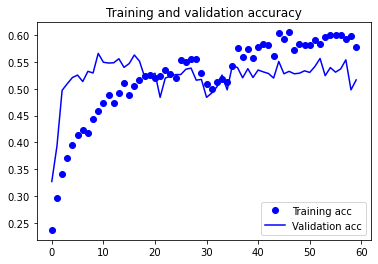

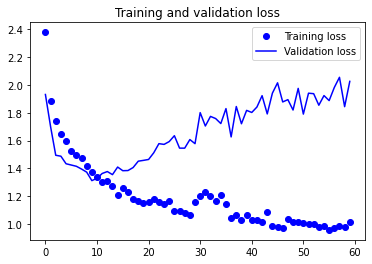

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
pre_train_model_4.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_4.keras')

#### Pre-Trained Model 5

Pre-trained model with Data Augmentation

In [3]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [4]:
img_size = 224

vgg19 = VGG19(weights='imagenet',
            include_top=False,
            input_shape=(img_size, img_size, 3))    

vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
pre_train_model_5 = models.Sequential()
pre_train_model_5.add(vgg19)
pre_train_model_5.add(layers.Flatten())
pre_train_model_5.add(layers.Dense(512, activation='relu'))
pre_train_model_5.add(layers.Dropout(0.5))
pre_train_model_5.add(layers.Dense(10, activation='softmax'))

pre_train_model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 32,875,082
Trainable params: 32,875,082
Non-trainable params: 0
_________________________________________________________________


In [6]:
vgg19.trainable = False

In [7]:
pre_train_model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 32,875,082
Trainable params: 12,850,698
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
pre_train_model_5.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [9]:
history = pre_train_model_5.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 179s 471ms/step - loss: 2.4640 - acc: 0.1677 - val_loss: 2.0468 - val_acc: 0.2670
Epoch 2/60
375/375 [==============================] - 176s 470ms/step - loss: 2.1084 - acc: 0.1989 - val_loss: 1.8646 - val_acc: 0.3360
Epoch 3/60
375/375 [==============================] - 176s 469ms/step - loss: 2.0832 - acc: 0.2147 - val_loss: 1.9662 - val_acc: 0.3190
Epoch 4/60
375/375 [==============================] - 176s 469ms/step - loss: 2.0390 - acc: 0.2284 - val_loss: 1.8342 - val_acc: 0.3375
Epoch 5/60
375/375 [==============================] - 175s 468ms/step - loss: 2.0295 - acc: 0.2215 - val_loss: 1.8127 - val_acc: 0.3655
Epoch 6/60
375/375 [==============================] - 176s 469ms/step - loss: 2.0135 - acc: 0.2364 - val_loss: 1.8622 - val_acc: 0.3560
Epoch 7/60
375/375 [==============================] - 176s 468ms/step - loss: 2.0097 - acc: 0.2397 - val_loss: 1.8448 - val_acc: 0.3700
Epoch 8/60
375/375 [============================

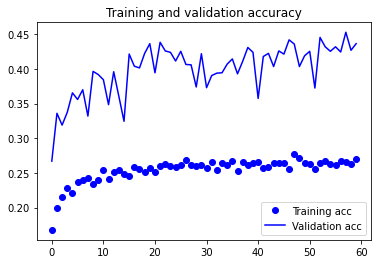

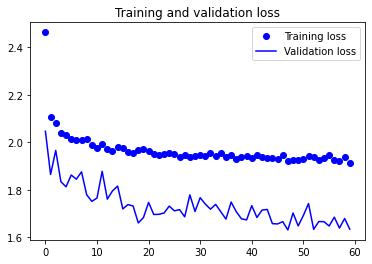

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
pre_train_model_5.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_5.keras')

#### Pre-Trained Model 6

Using InceptionV3 Without Data Augmentation

In [10]:
img_size = 224

IV3 = InceptionV3(weights='imagenet',
            include_top=False,
            input_shape=(img_size, img_size, 3))

IV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [12]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 5, 5, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = IV3.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
1/1 [==============================] - 0s 35ms/step
Found 2000 images belonging to 10 classes.
1/1 [==============================] - 0s 33ms/step
Found 500 images belonging to 10 classes.
1/1 [==============================] - 0s 37ms/step


In [14]:
print(train_features.shape)
print(train_labels.shape)

(7500, 5, 5, 2048)
(7500,)


In [15]:
train_features = np.reshape(train_features, (7500, 5 * 5 * 2048))
validation_features = np.reshape(validation_features, (2000, 5 * 5 * 2048))
test_features = np.reshape(test_features, (500, 5 * 5 * 2048))

In [16]:
pre_train_model_6 = models.Sequential()
pre_train_model_6.add(layers.Dense(512, activation='relu', input_dim=5 * 5 * 2048))
pre_train_model_6.add(layers.Dropout(0.5))
pre_train_model_6.add(layers.Dense(10, activation='softmax'))

pre_train_model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 26,220,042
Trainable params: 26,220,042
Non-trainable params: 0
_________________________________________________________________


In [17]:
pre_train_model_6.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [18]:

history = pre_train_model_6.fit(train_features, train_labels,
                    epochs=60,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/60
375/375 [==============================] - 14s 30ms/step - loss: 3.2699 - acc: 0.3672 - val_loss: 1.4451 - val_acc: 0.5325
Epoch 2/60
375/375 [==============================] - 7s 19ms/step - loss: 1.6293 - acc: 0.4101 - val_loss: 1.4996 - val_acc: 0.5120
Epoch 3/60
375/375 [==============================] - 7s 19ms/step - loss: 1.5396 - acc: 0.4328 - val_loss: 1.2713 - val_acc: 0.5650
Epoch 4/60
375/375 [==============================] - 7s 19ms/step - loss: 1.4256 - acc: 0.4655 - val_loss: 1.1904 - val_acc: 0.6245
Epoch 5/60
375/375 [==============================] - 8s 22ms/step - loss: 1.3865 - acc: 0.4688 - val_loss: 1.0872 - val_acc: 0.6485
Epoch 6/60
375/375 [==============================] - 8s 21ms/step - loss: 1.3205 - acc: 0.5045 - val_loss: 1.1607 - val_acc: 0.6425
Epoch 7/60
375/375 [==============================] - 7s 19ms/step - loss: 1.2671 - acc: 0.5297 - val_loss: 1.0950 - val_acc: 0.6610
Epoch 8/60
375/375 [==============================] - 7s 19ms/step -

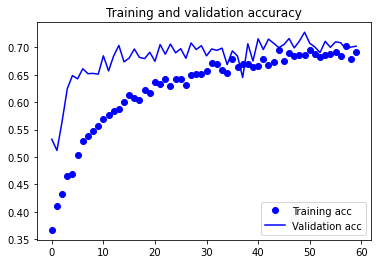

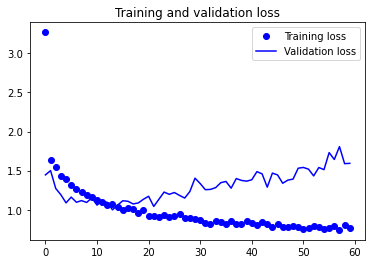

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
pre_train_model_6.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_6.keras')

#### Pre-Trained Model 7

Using InceptionV3 With Data Augmentation

In [21]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [22]:
IV3 = InceptionV3(weights='imagenet',
            include_top=False,
            input_shape=(img_size, img_size, 3))

IV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                      

In [23]:
pre_train_model_7 = models.Sequential()
pre_train_model_7.add(IV3)
pre_train_model_7.add(layers.Flatten())
pre_train_model_7.add(layers.Dense(512, activation='relu'))
pre_train_model_7.add(layers.Dropout(0.5))
pre_train_model_7.add(layers.Dense(10, activation='softmax'))

pre_train_model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 48,022,826
Trainable params: 47,988,394
Non-trainable params: 34,432
_________________________________________________________________


In [24]:
IV3.trainable = False

In [25]:
pre_train_model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 48,022,826
Trainable params: 26,220,042
Non-trainable params: 21,802,784
_________________________________________________________________


In [26]:
pre_train_model_7.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [27]:
history = pre_train_model_7.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=80,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/80
375/375 [==============================] - 122s 308ms/step - loss: 3.5672 - acc: 0.2997 - val_loss: 1.6227 - val_acc: 0.4530
Epoch 2/80
375/375 [==============================] - 108s 288ms/step - loss: 1.8408 - acc: 0.3293 - val_loss: 1.5128 - val_acc: 0.4985
Epoch 3/80
375/375 [==============================] - 108s 288ms/step - loss: 1.7576 - acc: 0.3457 - val_loss: 1.4437 - val_acc: 0.4935
Epoch 4/80
375/375 [==============================] - 116s 309ms/step - loss: 1.6771 - acc: 0.3825 - val_loss: 1.4685 - val_acc: 0.5030
Epoch 5/80
375/375 [==============================] - 140s 373ms/step - loss: 1.6664 - acc: 0.3771 - val_loss: 1.3650 - val_acc: 0.5360
Epoch 6/80
375/375 [==============================] - 113s 301ms/step - loss: 1.6265 - acc: 0.3984 - val_loss: 1.4575 - val_acc: 0.5065
Epoch 7/80
375/375 [==============================] - 117s 312ms/step - loss: 1.5878 - acc: 0.4057 - val_loss: 1.3384 - val_acc: 0.5475
Epoch 8/80
375/375 [============================

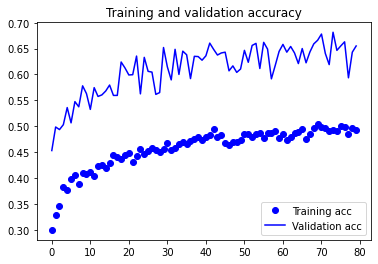

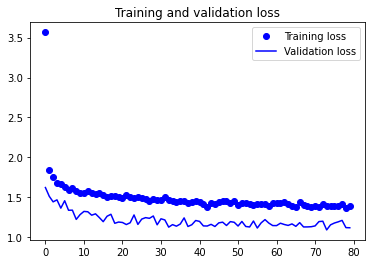

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
pre_train_model_7.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_7.keras')

#### Pre-Trained Model 8

Pre-Trained Model 2 in report

Using MobileNet With Data Augmentation and fine tuning after conv_dw_8 

In [16]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [17]:
img_size = 224

MN_base = MobileNet(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

MN_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [18]:
pre_train_model_8 = models.Sequential()
pre_train_model_8.add(MN_base)
pre_train_model_8.add(layers.Flatten())
pre_train_model_8.add(layers.Dense(1024, activation='relu'))
pre_train_model_8.add(layers.Dense(10, activation='softmax'))

pre_train_model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1024)              51381248  
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 54,598,474
Non-trainable params: 21,888
_________________________________________________________________


In [19]:
MN_base.trainable = True

set_trainable = False
for layer in MN_base.layers:
    if layer.name == 'conv_dw_8':
        set_trainable = True # after conv_dw_8, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
             
pre_train_model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1024)              51381248  
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 54,060,554
Non-trainable params: 559,808
_________________________________________________________________


In [20]:
pre_train_model_8.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [33]:
history = pre_train_model_8.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=80,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/80
375/375 [==============================] - 115s 296ms/step - loss: 2.6208 - acc: 0.5615 - val_loss: 0.9456 - val_acc: 0.7025
Epoch 2/80
375/375 [==============================] - 109s 290ms/step - loss: 0.9352 - acc: 0.6976 - val_loss: 0.8273 - val_acc: 0.7550
Epoch 3/80
375/375 [==============================] - 108s 288ms/step - loss: 0.8031 - acc: 0.7472 - val_loss: 1.3113 - val_acc: 0.6735
Epoch 4/80
375/375 [==============================] - 100s 266ms/step - loss: 0.7458 - acc: 0.7664 - val_loss: 0.8569 - val_acc: 0.7510
Epoch 5/80
375/375 [==============================] - 101s 268ms/step - loss: 0.6675 - acc: 0.7877 - val_loss: 0.9021 - val_acc: 0.7445
Epoch 6/80
375/375 [==============================] - 102s 273ms/step - loss: 0.6421 - acc: 0.7953 - val_loss: 1.0466 - val_acc: 0.7230
Epoch 7/80
375/375 [==============================] - 102s 272ms/step - loss: 0.5971 - acc: 0.8075 - val_loss: 0.8061 - val_acc: 0.7725
Epoch 8/80
375/375 [============================

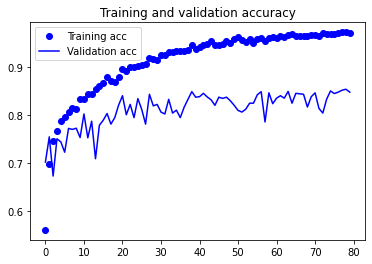

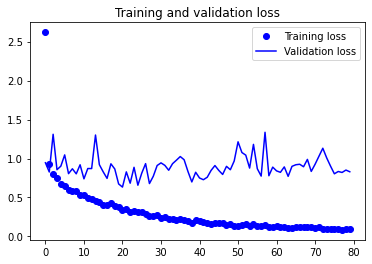

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
pre_train_model_8.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_8.keras')

#### Pre-Trained Model 9

Pre-Trained Model 3 in report

Using MobileNet With Data Augmentation and fine tuning after conv_dw_11 

In [47]:
img_size = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [55]:
img_size = 224

MN_base = MobileNet(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

MN_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [56]:
pre_train_model_9 = models.Sequential()
pre_train_model_9.add(MN_base)
pre_train_model_9.add(layers.Flatten())
pre_train_model_9.add(layers.Dense(1024, activation='relu'))
pre_train_model_9.add(layers.Dense(10, activation='softmax'))

pre_train_model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 50176)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)              51381248  
                                                                 
 dense_17 (Dense)            (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 54,598,474
Non-trainable params: 21,888
_________________________________________________________________


In [57]:
MN_base.trainable = True

set_trainable = False
for layer in MN_base.layers:
    if layer.name == 'conv_dw_11':
        set_trainable = True # after conv_dw_11, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
             
pre_train_model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 50176)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)              51381248  
                                                                 
 dense_17 (Dense)            (None, 10)                10250     
                                                                 
Total params: 54,620,362
Trainable params: 53,254,154
Non-trainable params: 1,366,208
_________________________________________________________________


In [58]:
pre_train_model_9.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [59]:
history = pre_train_model_9.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/60
375/375 [==============================] - 130s 338ms/step - loss: 2.4933 - acc: 0.5941 - val_loss: 1.0617 - val_acc: 0.6895
Epoch 2/60
375/375 [==============================] - 124s 329ms/step - loss: 0.8530 - acc: 0.7285 - val_loss: 1.2796 - val_acc: 0.6490
Epoch 3/60
375/375 [==============================] - 141s 374ms/step - loss: 0.7334 - acc: 0.7653 - val_loss: 0.8525 - val_acc: 0.7575
Epoch 4/60
375/375 [==============================] - 116s 308ms/step - loss: 0.6846 - acc: 0.7823 - val_loss: 1.2345 - val_acc: 0.6390
Epoch 5/60
375/375 [==============================] - 112s 299ms/step - loss: 0.6239 - acc: 0.7995 - val_loss: 1.0722 - val_acc: 0.7230
Epoch 6/60
375/375 [==============================] - 112s 299ms/step - loss: 0.5774 - acc: 0.8111 - val_loss: 1.2757 - val_acc: 0.6895
Epoch 7/60
375/375 [==============================] - 112s 298ms/step - loss: 0.5410 - acc: 0.8224 - val_loss: 0.9811 - val_acc: 0.7445
Epoch 8/60
375/375 [============================

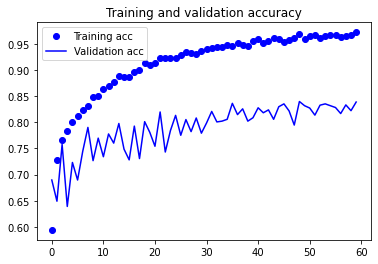

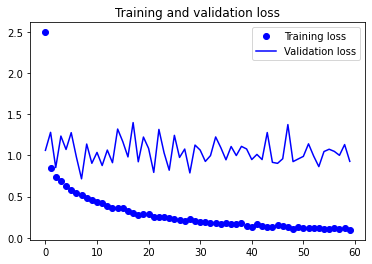

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
pre_train_model_9.save('D:\\documents\\Y2 Sem 2\\DL\\Assignment 1\\Model\\pre_train_model_9.keras')

## Step 3 – Evaluate the Developed Models using Testing Images

In [103]:
# Model 10
# This model number is the number given in report

img_size = 224

model9  = keras.models.load_model('./Model/model_4.2.keras')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = model9.evaluate(test_generator, steps=25)
print('test acc:', test_acc)


Found 500 images belonging to 10 classes.
25/25 [==============================] - 5s 173ms/step - loss: 0.8758 - acc: 0.7500
test acc: 0.7500000596046448


In [22]:
# Model 11 
# This model number is the number given in report

img_size = 224

model11 = keras.models.load_model('./Model/model_4.3.keras')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = model11.evaluate(test_generator, steps=25)
print('test acc:', test_acc)


Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 93ms/step - loss: 0.7401 - acc: 0.7900
test acc: 0.7900000214576721


In [29]:
# Model 12
# This model number is the number given in report

img_size = 224

model12 = keras.models.load_model('./Model/model_4.5.keras')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = model12.evaluate(test_generator, steps=25)
print('test acc:', test_acc)


Found 500 images belonging to 10 classes.
25/25 [==============================] - 8s 278ms/step - loss: 0.8992 - acc: 0.7040
test acc: 0.7040000557899475


In [26]:
# pre_train_model_1
# This model number is the number given in report
img_size = 224

pre_train_model1 = keras.models.load_model('./Model/pre_train_model_3.keras')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = pre_train_model1.evaluate(test_generator, steps=25)
print('test acc:', test_acc)


Found 500 images belonging to 10 classes.
25/25 [==============================] - 5s 110ms/step - loss: 1.0214 - acc: 0.7600
test acc: 0.7600000500679016


In [87]:
# pre-train model 2
# This model number is the number given in report
img_size = 224

pre_train_model2 = keras.models.load_model('./Model/pre_train_model_8.keras')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = pre_train_model2.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 100ms/step - loss: 0.9125 - acc: 0.8120
test acc: 0.812000036239624


In [88]:
# pre-train model 3
# This model number is the number given in report
img_size = 224

pre_train_model3 = keras.models.load_model('./Model/pre_train_model_9.keras')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = pre_train_model3.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 92ms/step - loss: 0.9410 - acc: 0.8280
test acc: 0.8280000686645508


In [89]:
pre_train_model3.save('./Model/food_model_best.keras')

## Step 4  – Use the best model to make prediction

In [3]:
# Load the model
model = keras.models.load_model('./Model/food_model_best.keras')

In [4]:
# Load the food list (in alphabetical order)
with open('6.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['apple_pie', 'bruschetta', 'ceviche', 'churros', 'dumplings', 'french_fries', 'french_toast', 'hummus', 'onion_rings', 'ravioli']


In [5]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

img_size = 224
import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

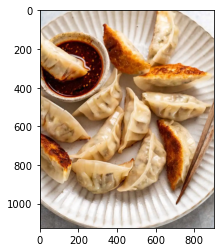

1/1 [==============================] - 3s 3s/step
The prediction is:  dumplings 

       apple_pie    bruschetta       ceviche       churros  dumplings  \
0  3.845549e-09  1.041492e-09  7.010045e-11  5.937088e-07   0.999455   

   french_fries  french_toast    hummus   onion_rings       ravioli  
0  2.126364e-07  1.503612e-08  0.000544  3.912907e-08  2.086527e-08  


In [93]:
import matplotlib.pyplot as plt
img = 'Vegetable-Dumplings-1-on-plate.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

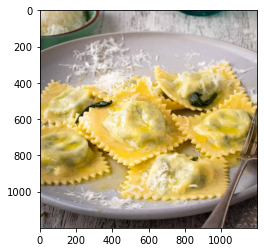

1/1 [==============================] - 0s 39ms/step
The prediction is:  ravioli 

       apple_pie    bruschetta       ceviche       churros     dumplings  \
0  9.620463e-10  3.692423e-10  1.696012e-09  2.315191e-15  1.144871e-11   

   french_fries  french_toast        hummus   onion_rings  ravioli  
0  1.092729e-11  4.838628e-12  1.440755e-08  1.149917e-15      1.0  


In [94]:
import matplotlib.pyplot as plt
img = 'spinach-ricotta-ravioli-featured.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

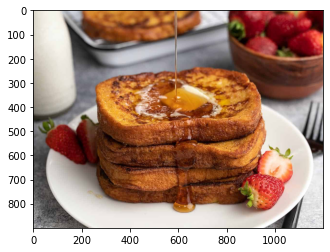

1/1 [==============================] - 0s 33ms/step
The prediction is:  french_toast 

       apple_pie    bruschetta       ceviche       churros     dumplings  \
0  4.656577e-14  5.021414e-17  2.963602e-21  8.491405e-14  1.102808e-29   

   french_fries  french_toast        hummus   onion_rings       ravioli  
0  5.824002e-23           1.0  4.869284e-17  7.577078e-17  1.296098e-15  


In [95]:
import matplotlib.pyplot as plt
img = 'French-Toast-syrup.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

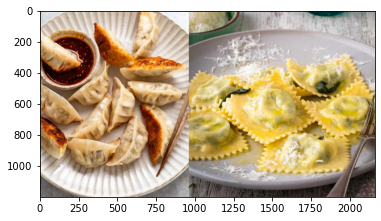

1/1 [==============================] - 0s 28ms/step
The prediction is:  ravioli 

    apple_pie  bruschetta   ceviche       churros  dumplings  french_fries  \
0   0.000015    0.000014  0.000041  3.024652e-08   0.000003      0.000002   

   french_toast   hummus   onion_rings   ravioli  
0      0.000002  0.00008  2.089625e-08  0.999844  


In [96]:
import matplotlib.pyplot as plt
img = 'combined image.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

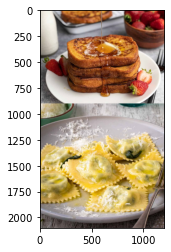

1/1 [==============================] - 0s 28ms/step
The prediction is:  french_toast 

    apple_pie  bruschetta   ceviche   churros     dumplings  french_fries  \
0   0.004726    0.025218  0.000525  0.291342  4.750287e-07      0.000046   

   french_toast    hummus  onion_rings   ravioli  
0      0.664722  0.004459     0.000421  0.008541  


In [97]:
import matplotlib.pyplot as plt
img = 'combined image 2.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

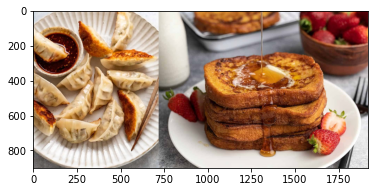

1/1 [==============================] - 0s 31ms/step
The prediction is:  french_toast 

       apple_pie    bruschetta       ceviche       churros     dumplings  \
0  1.495205e-07  1.113846e-07  1.576840e-10  7.011212e-09  3.152263e-14   

   french_fries  french_toast        hummus   onion_rings       ravioli  
0  2.855095e-12           1.0  1.476088e-09  4.059723e-08  3.603177e-08  


In [98]:
import matplotlib.pyplot as plt
img = 'combined image 3.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

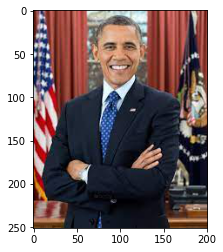

1/1 [==============================] - 0s 34ms/step
The prediction is:  churros 

    apple_pie  bruschetta   ceviche  churros  dumplings  french_fries  \
0   0.000241    0.000096  0.000291   0.9988   0.000027      0.000044   

   french_toast    hummus  onion_rings  ravioli  
0      0.000112  0.000305     0.000064  0.00002  


In [99]:
import matplotlib.pyplot as plt
img = 'obama.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

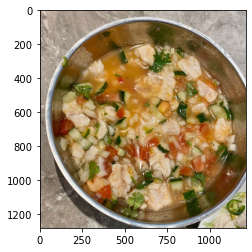

1/1 [==============================] - 0s 25ms/step
The prediction is:  ceviche 

       apple_pie    bruschetta  ceviche       churros     dumplings  \
0  2.308002e-11  9.348370e-09      1.0  8.497289e-12  4.876827e-10   

   french_fries  french_toast        hummus   onion_rings       ravioli  
0  4.257281e-12  3.468964e-11  2.809849e-08  8.627354e-14  2.501482e-09  


In [100]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Ceviche.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

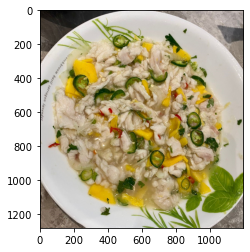

1/1 [==============================] - 0s 24ms/step
The prediction is:  ceviche 

       apple_pie  bruschetta   ceviche       churros     dumplings  \
0  9.680682e-09    0.000001  0.999984  1.527377e-09  2.900625e-07   

   french_fries  french_toast    hummus   onion_rings       ravioli  
0  9.804941e-10  7.921835e-09  0.000014  2.508632e-10  4.370523e-07  


In [101]:
img = 'Tryout2.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

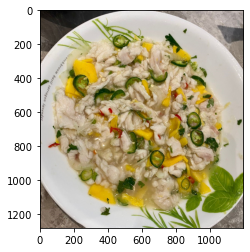

1/1 [==============================] - 1s 1s/step
The prediction is:  ceviche 

       apple_pie  bruschetta   ceviche       churros     dumplings  \
0  9.680682e-09    0.000001  0.999984  1.527377e-09  2.900625e-07   

   french_fries  french_toast    hummus   onion_rings       ravioli  
0  9.804941e-10  7.921835e-09  0.000014  2.508632e-10  4.370523e-07  


In [6]:
img = 'Tryout2.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)